# Cnotl6l

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, mannwhitneyu

In [2]:
gene = 'Cnot6l'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30513738,C57BL/6N,m,mutant,hom (Cnot6l),25.5,81.74,48.66,2.83,1.40
1,30513739,C57BL/6N,m,control,wt (Cnot6l),23.8,90.47,60.47,2.76,1.13
2,30513742,C57BL/6N,f,control,wt (Cnot6l),22.2,85.73,53.75,2.93,1.40
3,30513745,C57BL/6N,m,mutant,hom (Cnot6l),26.0,88.63,58.27,2.74,1.29
4,30513746,C57BL/6N,f,control,wt (Cnot6l),26.5,91.93,62.64,3.08,1.13
5,30513747,C57BL/6N,f,mutant,hom (Cnot6l),24.1,75.51,43.10,3.37,1.86
6,30513749,C57BL/6N,f,control,wt (Cnot6l),23.5,91.08,61.14,3.25,1.19
7,30513756,C57BL/6N,f,control,wt (Cnot6l),19.3,73.90,41.24,2.74,1.66
8,30513757,C57BL/6N,f,control,wt (Cnot6l),22.7,92.95,63.83,2.58,0.91
9,30513782,C57BL/6N,m,control,wt (Sytl4),26.7,85.69,53.66,2.71,1.20


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30514079,Cnot6l_1v1_1.dcm,2.621221,0.047500,1.155814,0.015000,642.857143,0.047500,0.937580,high,0.937580,high,25.107276,3.039645,87.893371,55.905512,C57BL/6N,f,mutant,hom (Cnot6l),20.7,82.25,48.90,2.46,1.25,0.161221,2.540610,-0.094186,1.202907,5.643371,7.005512
1,30514079,Cnot6l_1v1_1.dcm,2.414826,0.140833,1.073256,0.105000,553.846154,0.140833,0.937580,high,0.937580,high,20.472684,2.491558,87.829842,55.555556,C57BL/6N,f,mutant,hom (Cnot6l),20.7,82.25,48.90,2.46,1.25,-0.045174,2.437413,-0.176744,1.161628,5.579842,6.655556
2,30514079,Cnot6l_1v1_1.dcm,2.476744,0.249167,0.949419,0.185000,712.871287,0.249167,0.917810,high,0.917810,high,21.807783,1.788553,91.798556,61.666667,C57BL/6N,f,mutant,hom (Cnot6l),20.7,82.25,48.90,2.46,1.25,0.016744,2.468372,-0.300581,1.099709,9.548556,12.766667
3,30514079,Cnot6l_1v1_1.dcm,2.579942,0.333333,1.114535,0.285833,654.545455,0.333333,0.917810,high,0.917810,high,24.138125,2.757472,88.576277,56.800000,C57BL/6N,f,mutant,hom (Cnot6l),20.7,82.25,48.90,2.46,1.25,0.119942,2.519971,-0.135465,1.182267,6.326277,7.900000
4,30514079,Cnot6l_1v1_1.dcm,2.600581,0.425000,1.176453,0.374167,637.168142,0.425000,0.880034,high,0.880034,high,24.620048,3.186910,87.055632,54.761905,C57BL/6N,f,mutant,hom (Cnot6l),20.7,82.25,48.90,2.46,1.25,0.140581,2.530291,-0.073547,1.213227,4.805632,5.861905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6456,30513782,Sytl4_1v1_144.dcm,2.641860,4.435000,0.949419,4.387500,672.897196,4.435000,0.944724,high,0.944724,high,25.599816,1.788553,93.013414,64.062500,C57BL/6N,m,control,wt (Sytl4),26.7,85.69,53.66,2.71,1.20,-0.068140,2.675930,-0.250581,1.074709,7.323414,10.402500
6457,30513782,Sytl4_1v1_144.dcm,2.497384,4.524167,0.784302,4.474167,800.000000,4.524167,0.999226,high,0.944724,high,22.263310,1.060558,95.236299,68.595041,C57BL/6N,m,control,wt (Sytl4),26.7,85.69,53.66,2.71,1.20,-0.212616,2.603692,-0.415698,0.992151,9.546299,14.935041
6458,30513782,Sytl4_1v1_144.dcm,2.662500,4.599167,0.970058,4.558333,750.000000,4.599167,0.999226,high,0.999226,high,26.097677,1.896068,92.734725,63.565891,C57BL/6N,m,control,wt (Sytl4),26.7,85.69,53.66,2.71,1.20,-0.047500,2.686250,-0.229942,1.085029,7.044725,9.905891
6459,30513782,Sytl4_1v1_144.dcm,2.641860,4.679167,0.949419,4.640000,615.384615,4.679167,0.999226,high,0.999226,high,25.599816,1.788553,93.013414,64.062500,C57BL/6N,m,control,wt (Sytl4),26.7,85.69,53.66,2.71,1.20,-0.068140,2.675930,-0.250581,1.074709,7.323414,10.402500


In [5]:
filtered_data[['LVIDd_auto', 'LVIDs_auto', 'EF_auto', 'FS_auto', 'genotype', 'sex']].groupby(by=['sex','genotype']).agg(['mean', 'std']).round(2).to_latex()

'\\begin{tabular}{llrrrrrrrr}\n\\toprule\n  &        & \\multicolumn{2}{l}{LVIDd\\_auto} & \\multicolumn{2}{l}{LVIDs\\_auto} & \\multicolumn{2}{l}{EF\\_auto} & \\multicolumn{2}{l}{FS\\_auto} \\\\\n  &        &       mean &   std &       mean &   std &    mean &    std &    mean &    std \\\\\nsex & genotype &            &       &            &       &         &        &         &        \\\\\n\\midrule\nf & control &       2.62 &  0.29 &       0.97 &  0.25 &   91.39 &   7.38 &   62.75 &   8.51 \\\\\n  & mutant &       2.55 &  0.26 &       1.10 &  0.32 &   86.58 &  12.51 &   56.70 &  11.92 \\\\\nm & control &       2.69 &  0.22 &       1.01 &  0.21 &   91.43 &   5.70 &   62.43 &   7.19 \\\\\n  & mutant &       2.65 &  0.28 &       1.20 &  0.28 &   85.98 &   7.62 &   54.69 &   8.50 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [6]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Differences between automatic and manual measurements

In [7]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

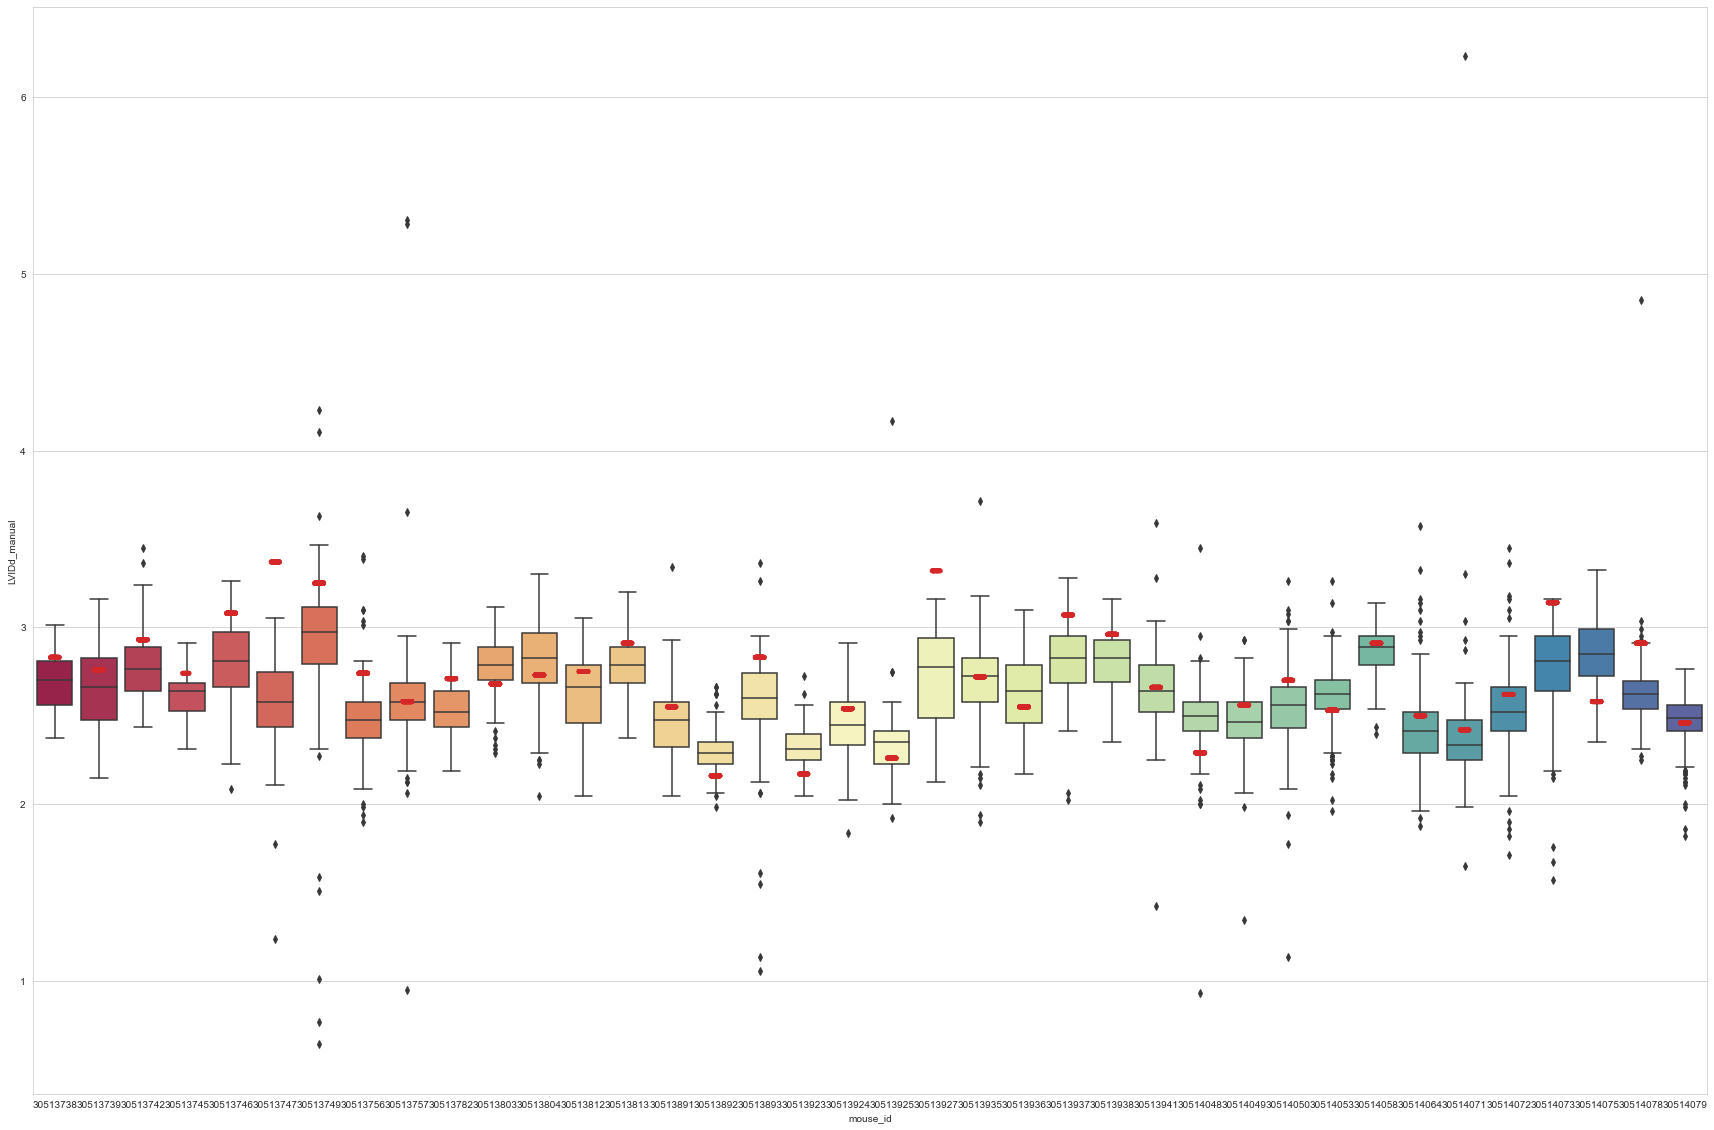

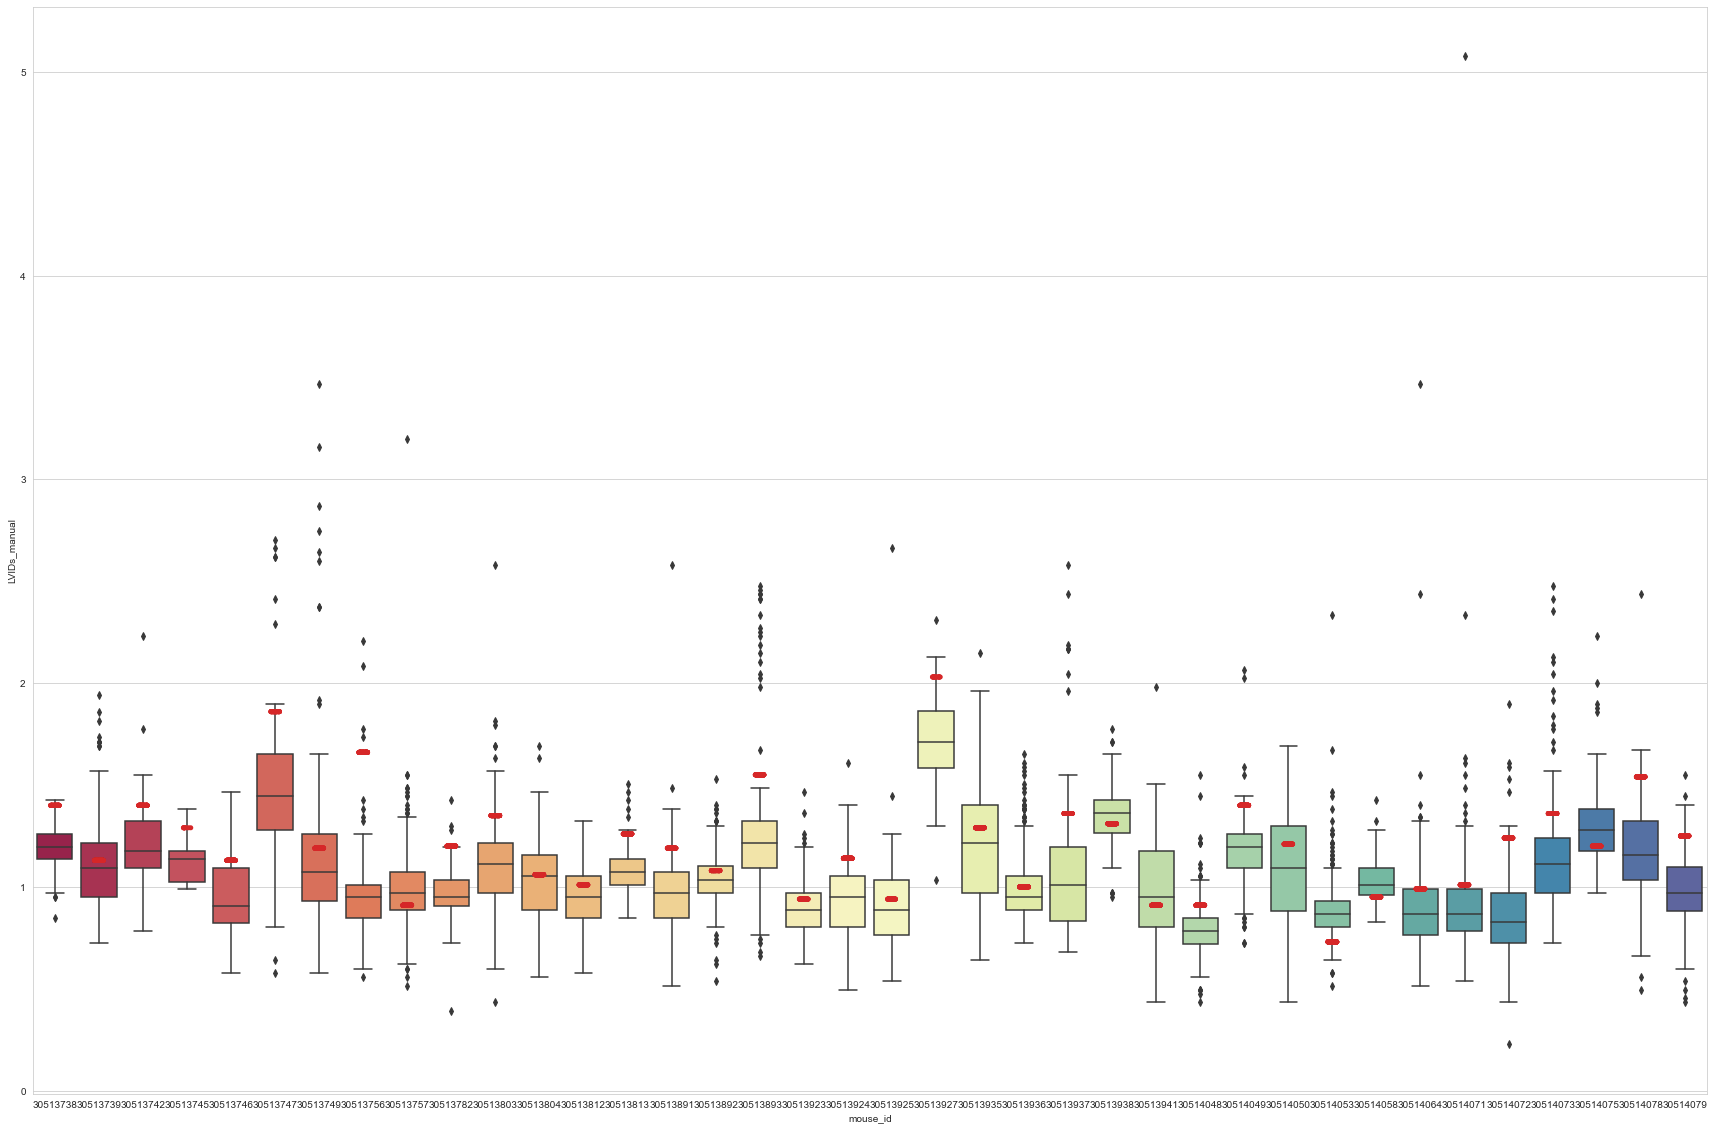

In [8]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_79791/1900006949.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize= (10,10))


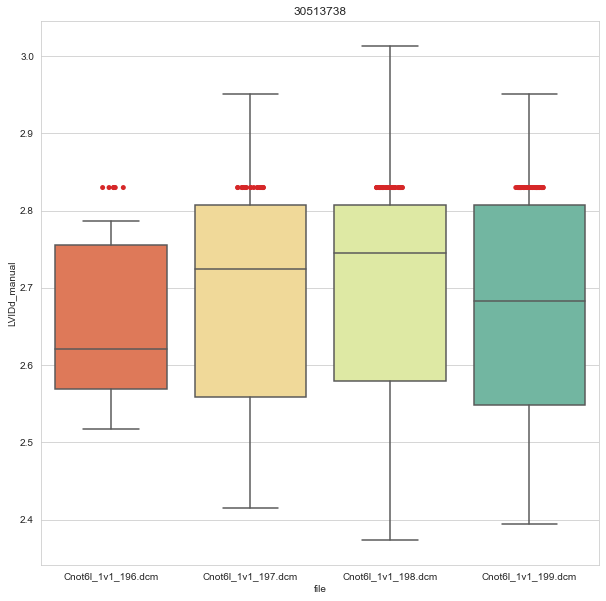

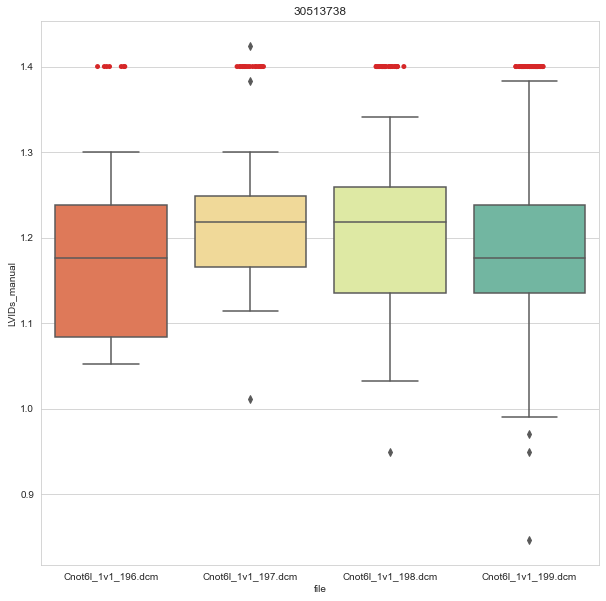

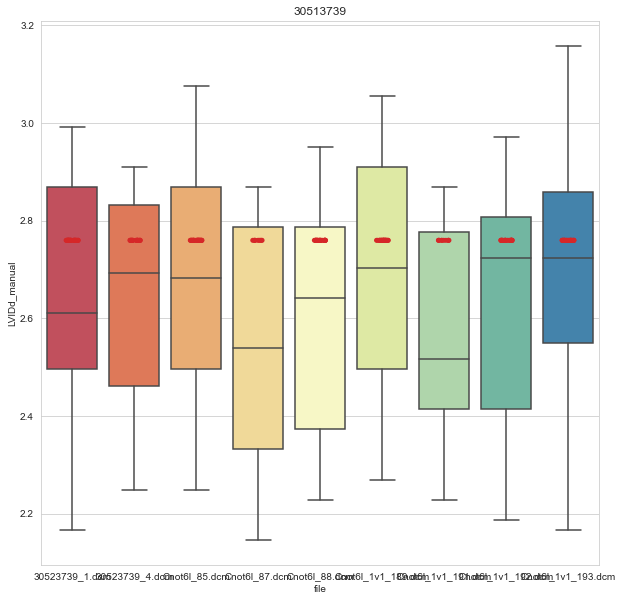

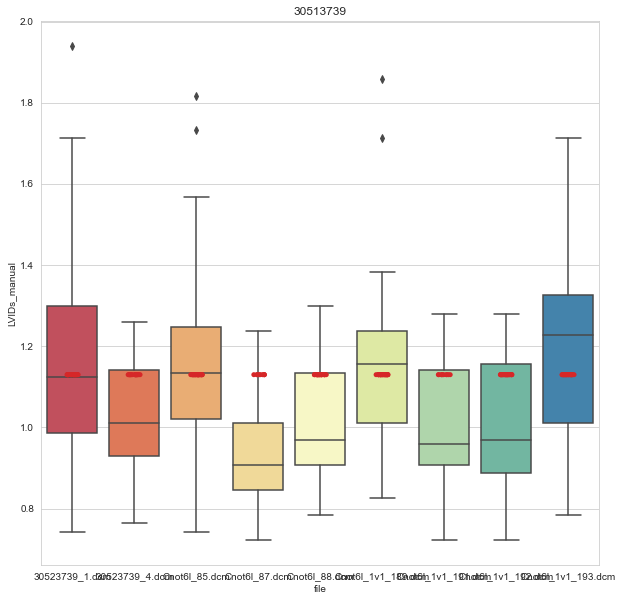

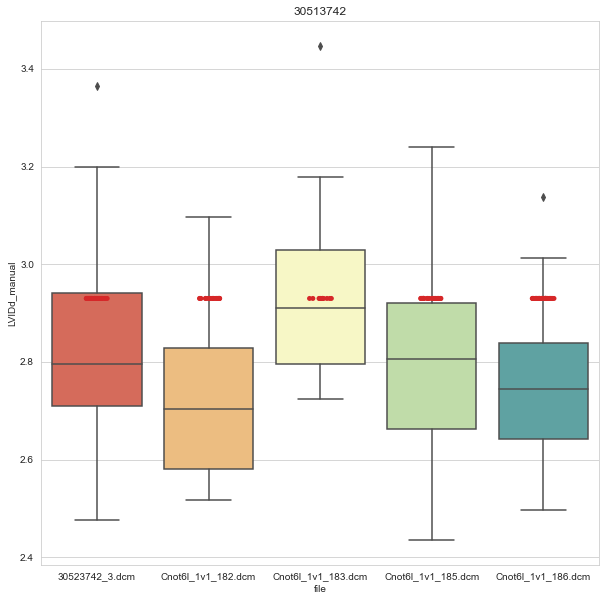

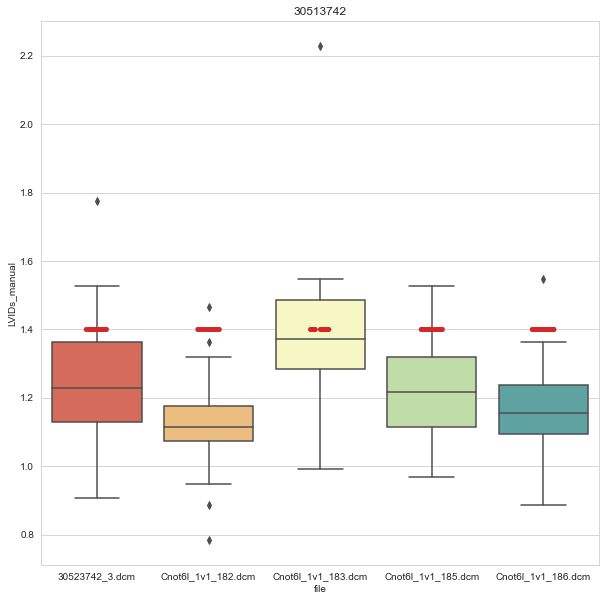

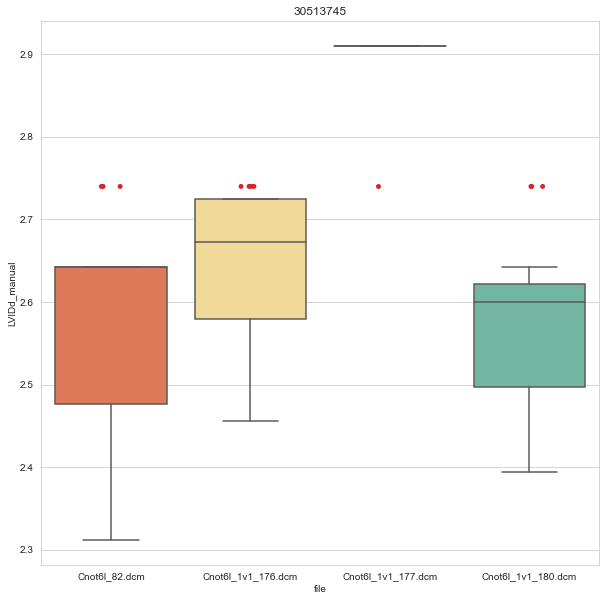

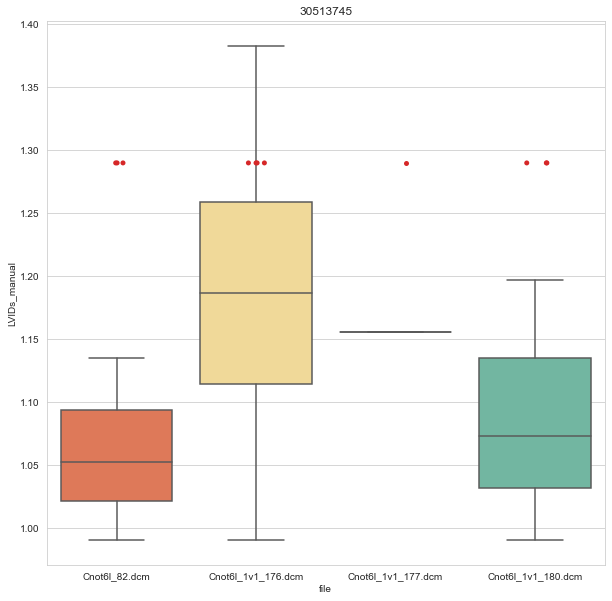

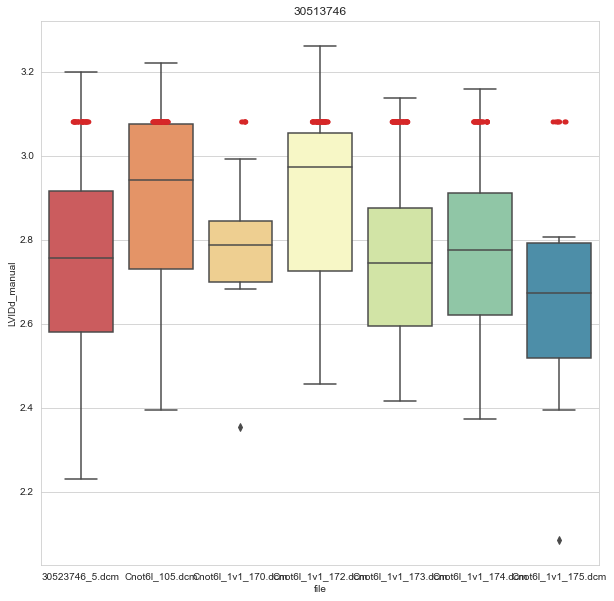

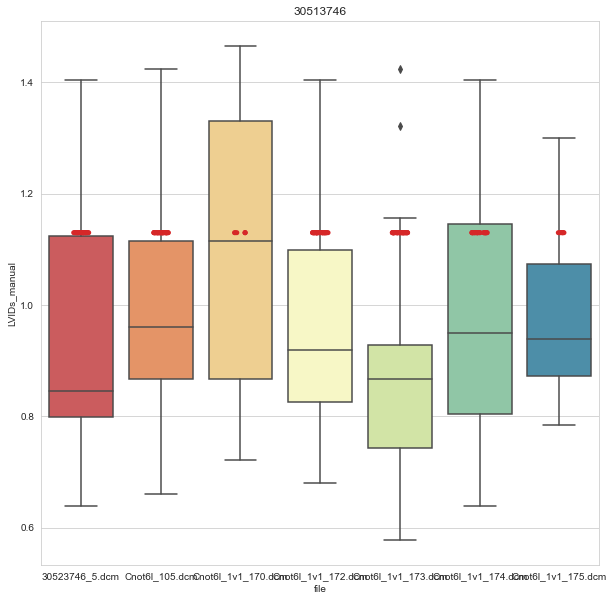

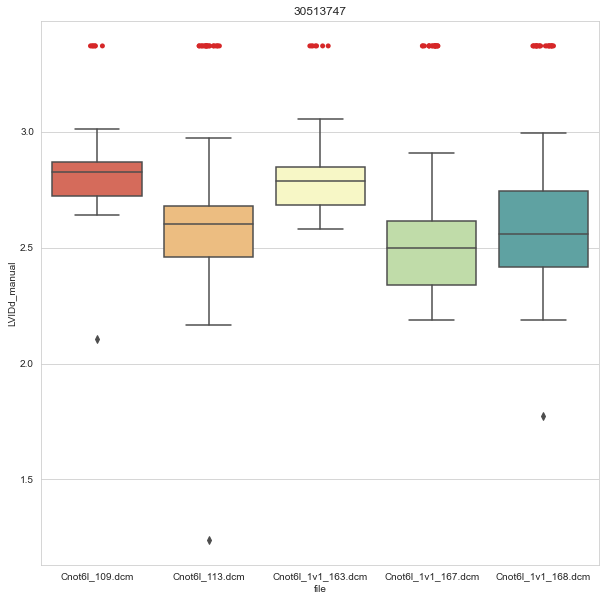

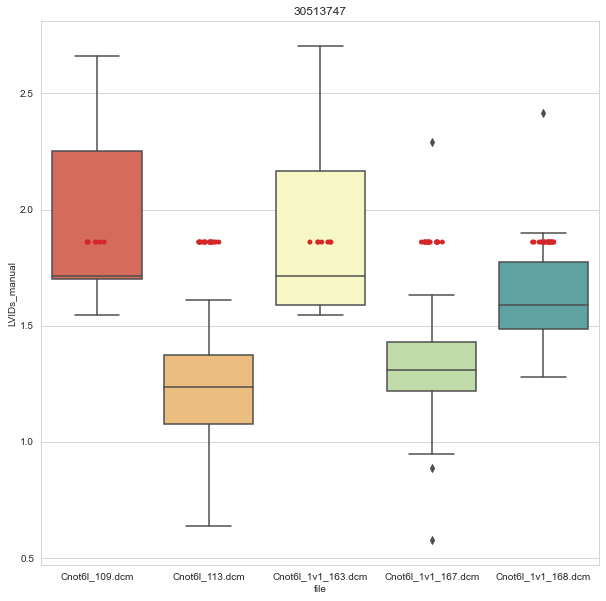

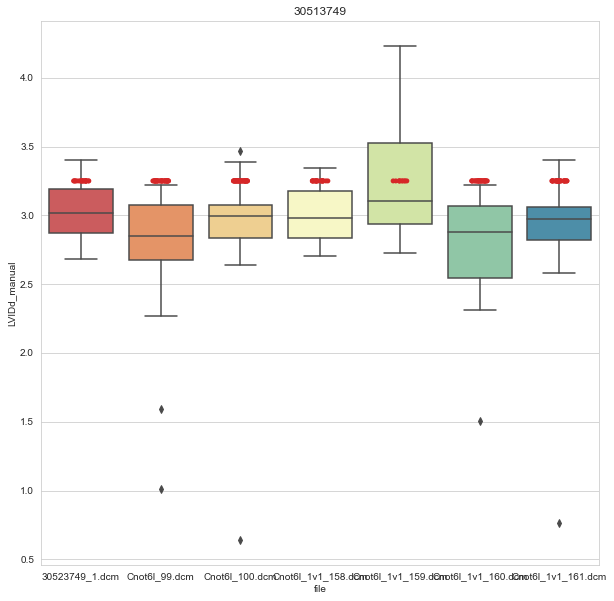

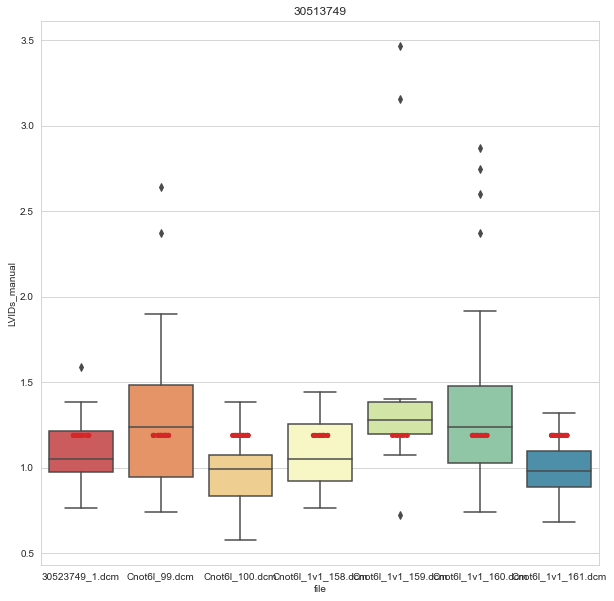

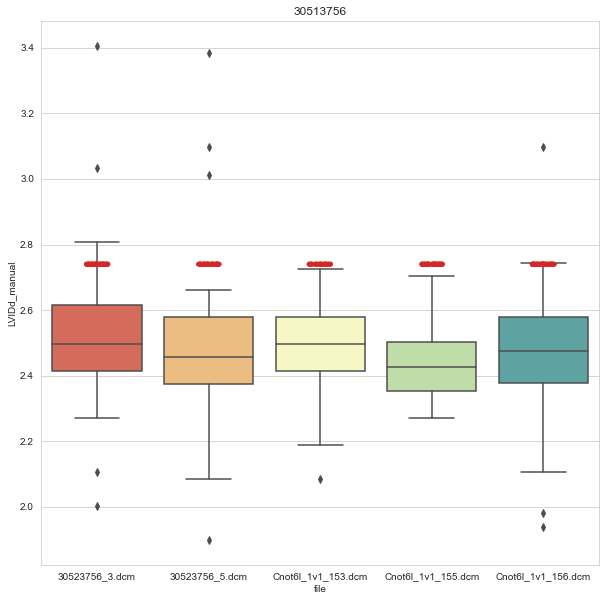

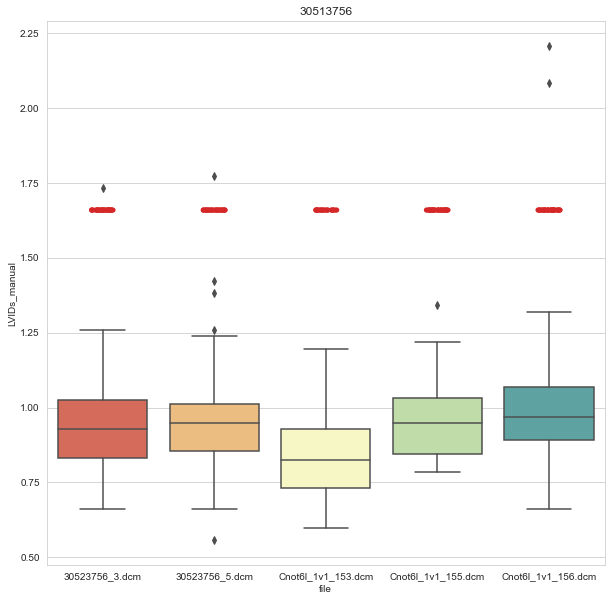

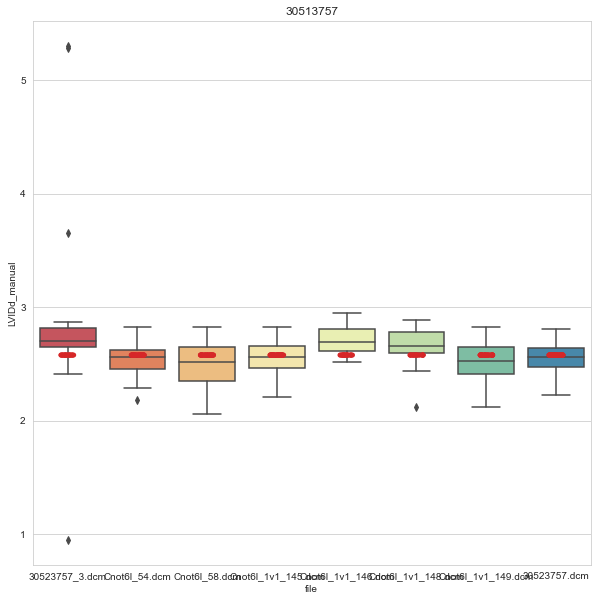

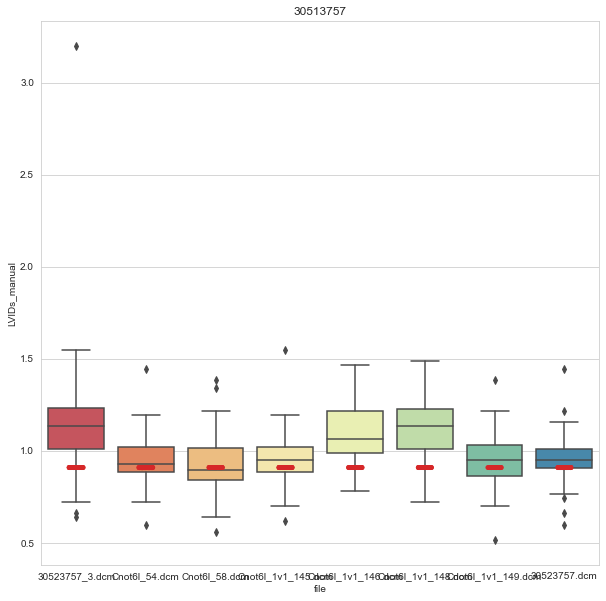

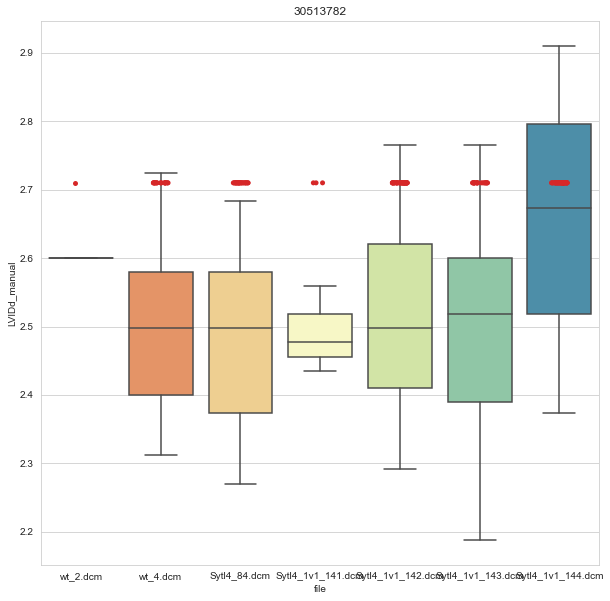

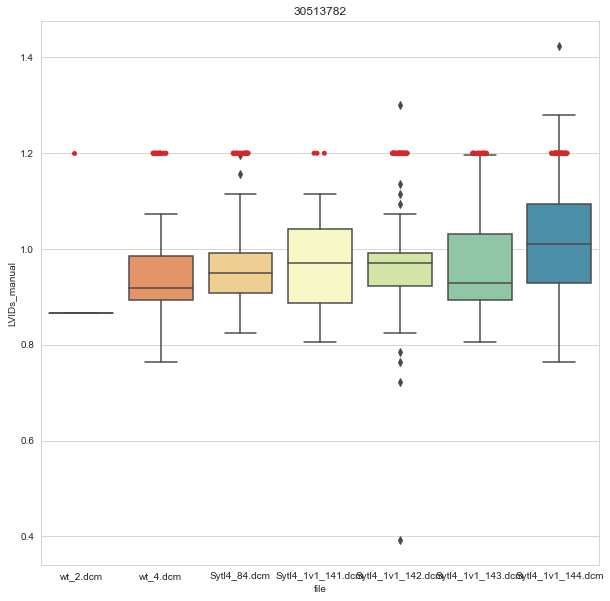

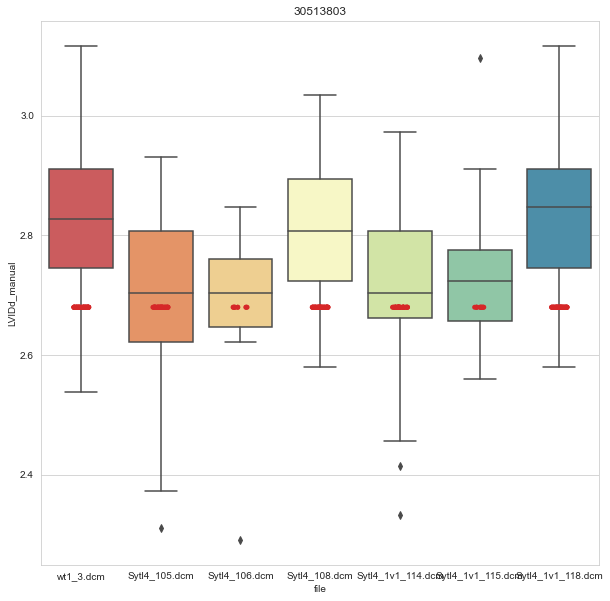

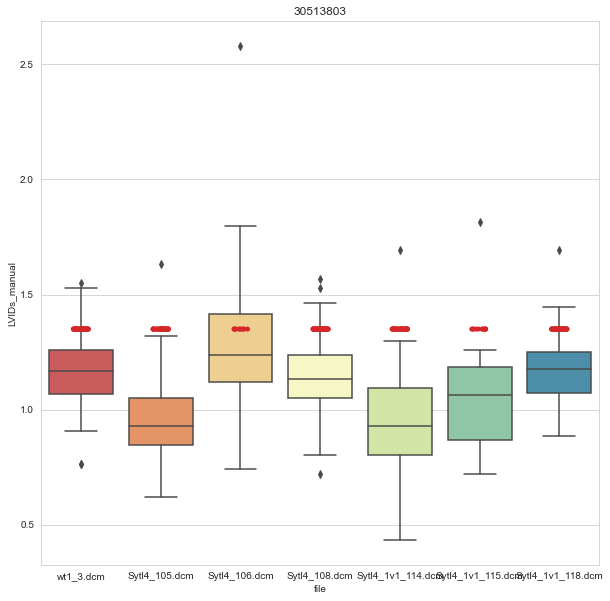

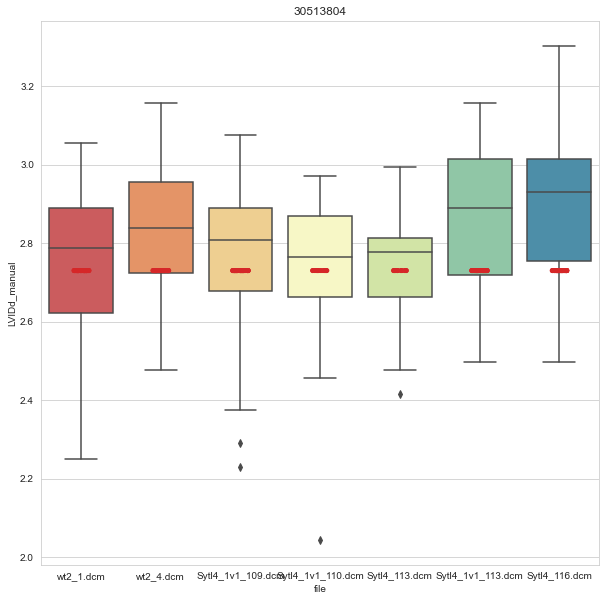

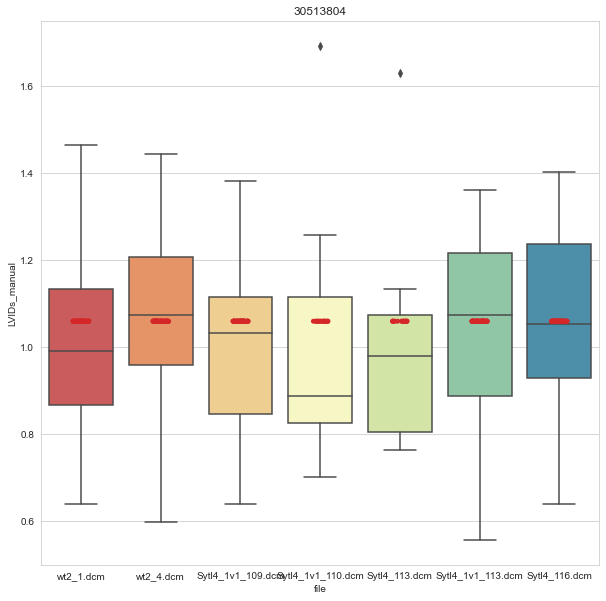

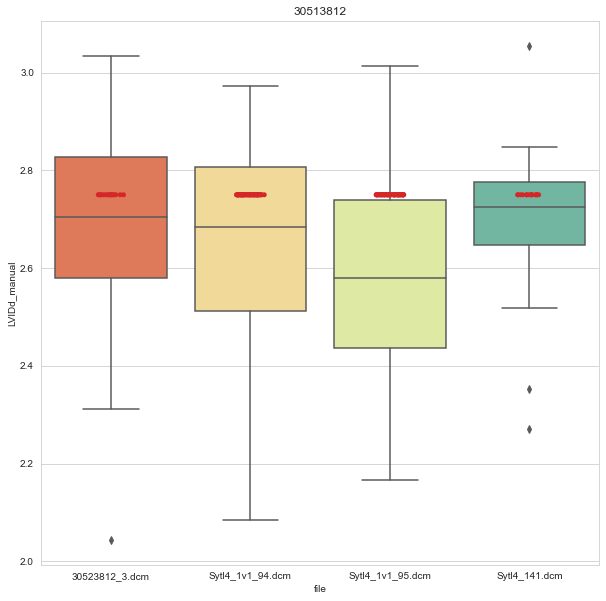

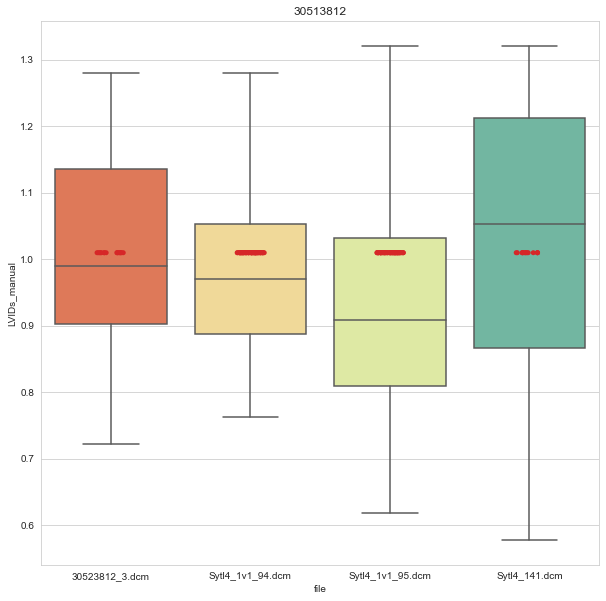

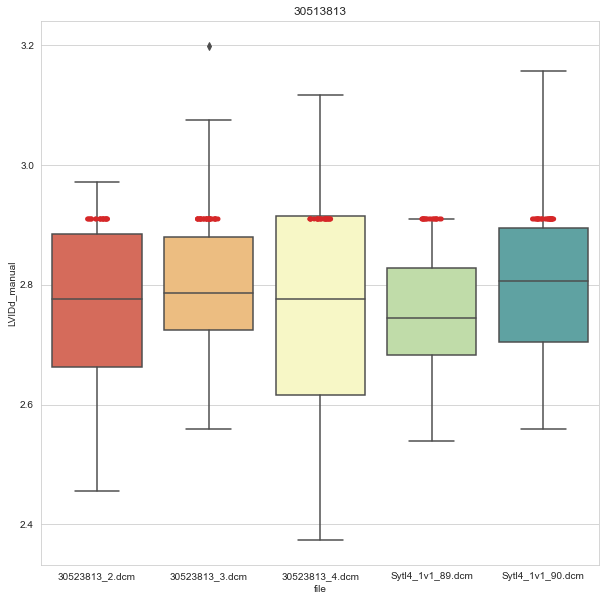

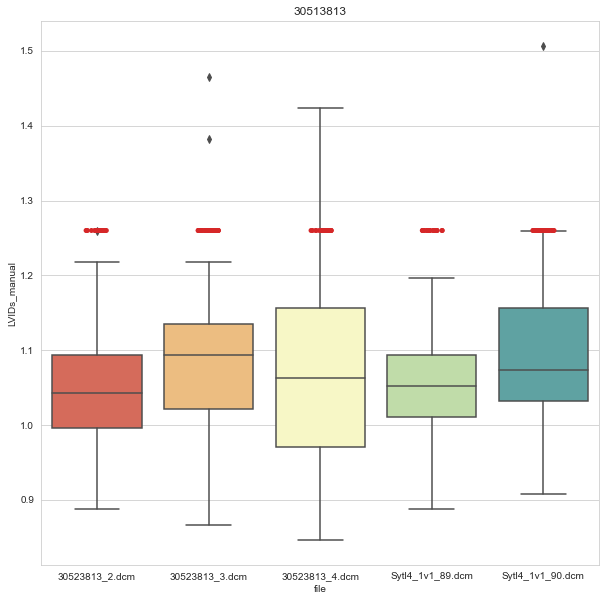

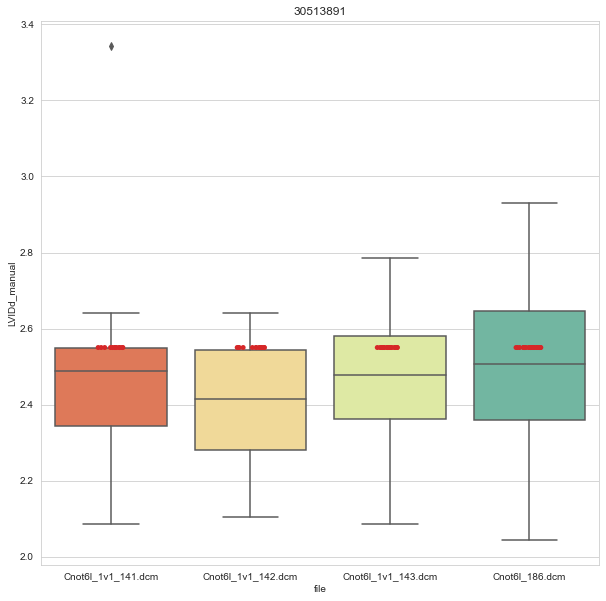

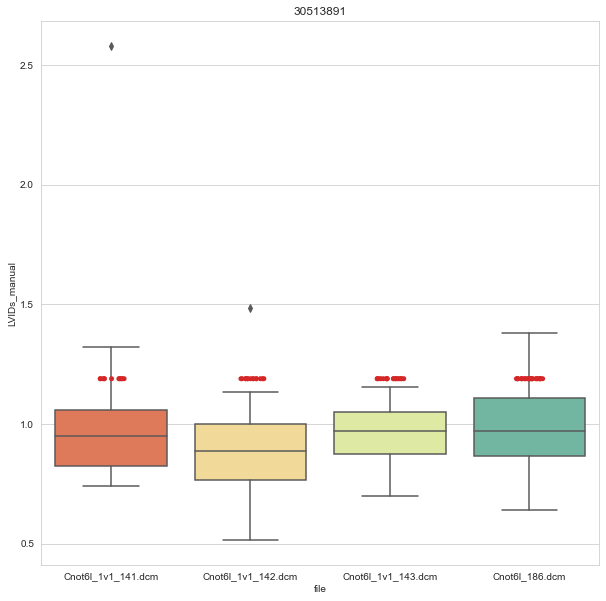

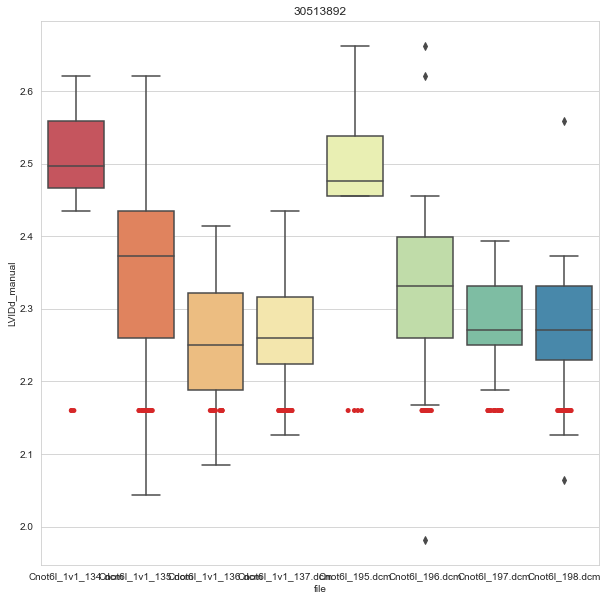

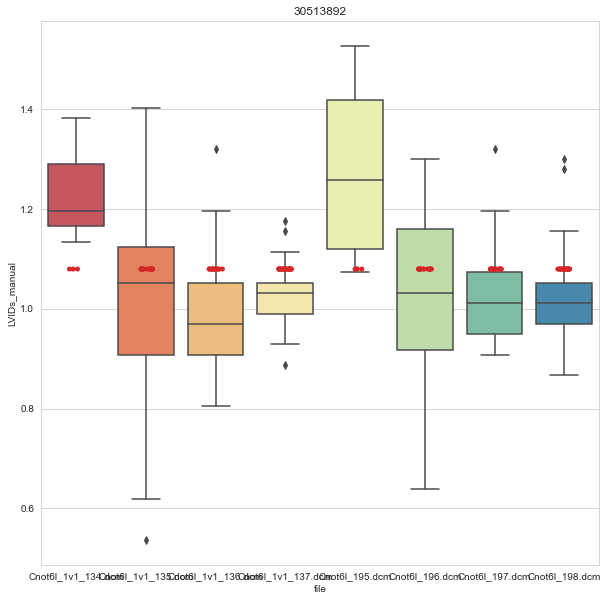

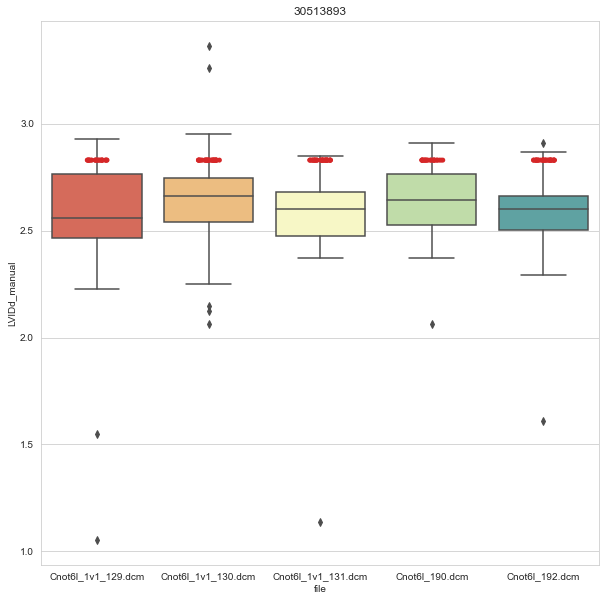

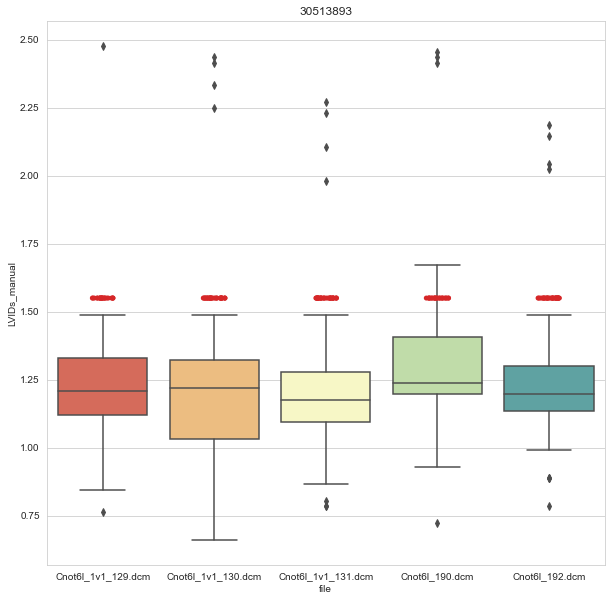

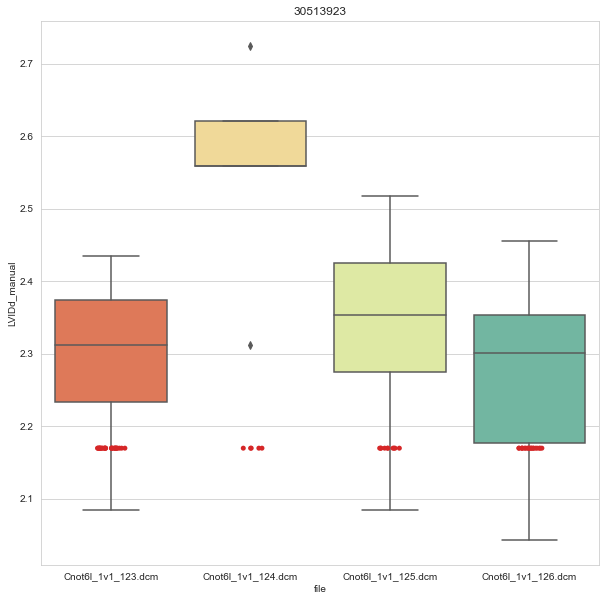

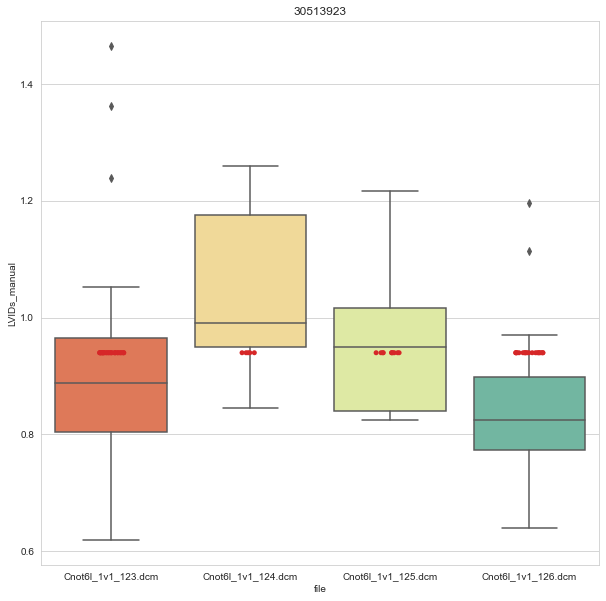

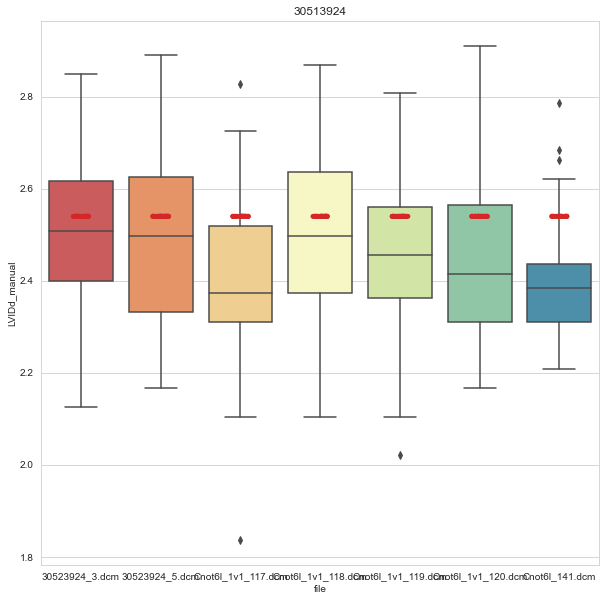

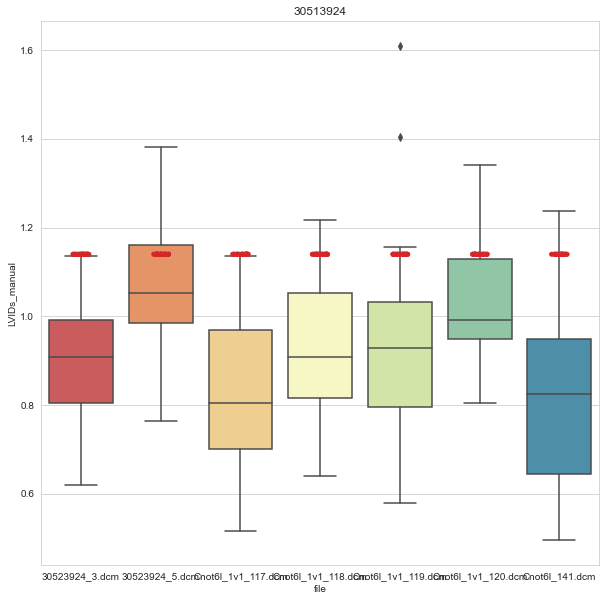

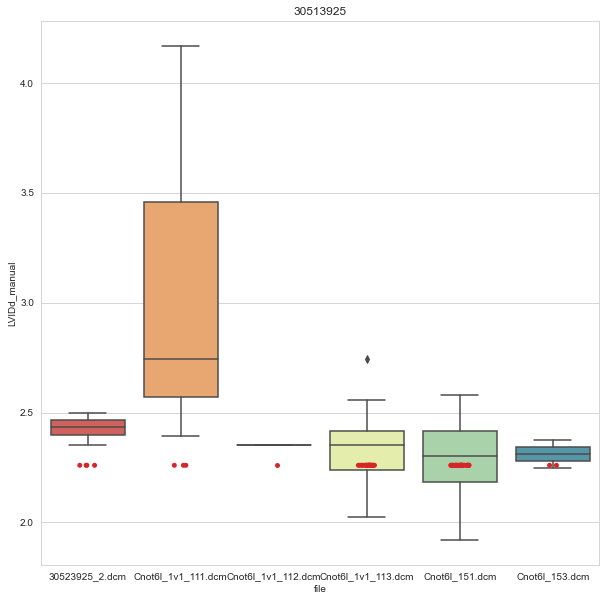

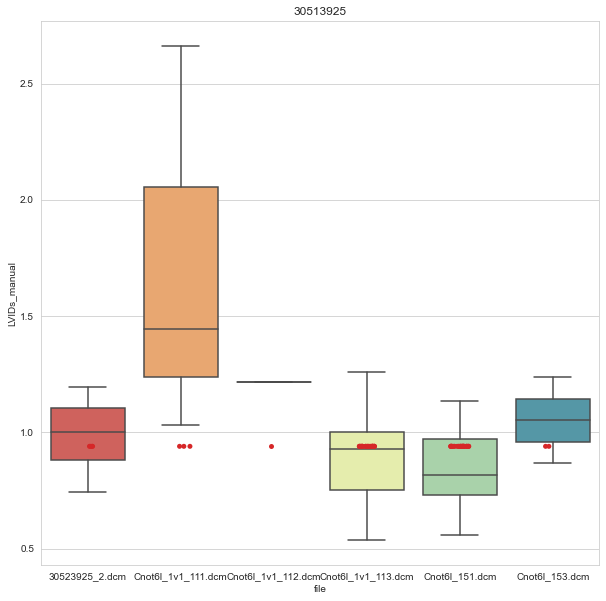

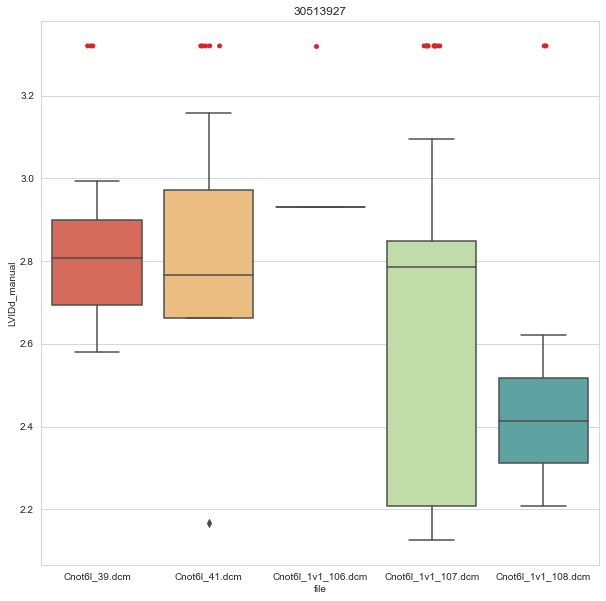

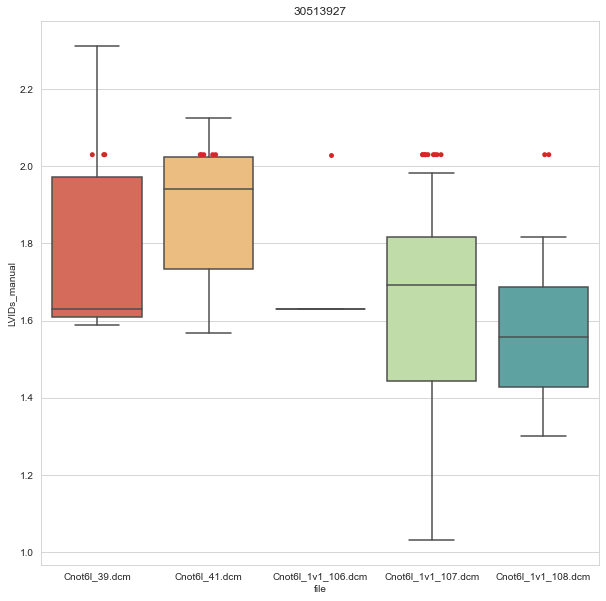

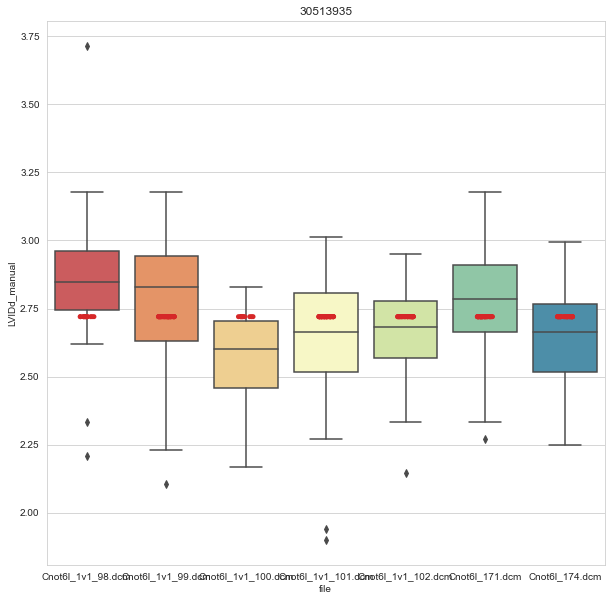

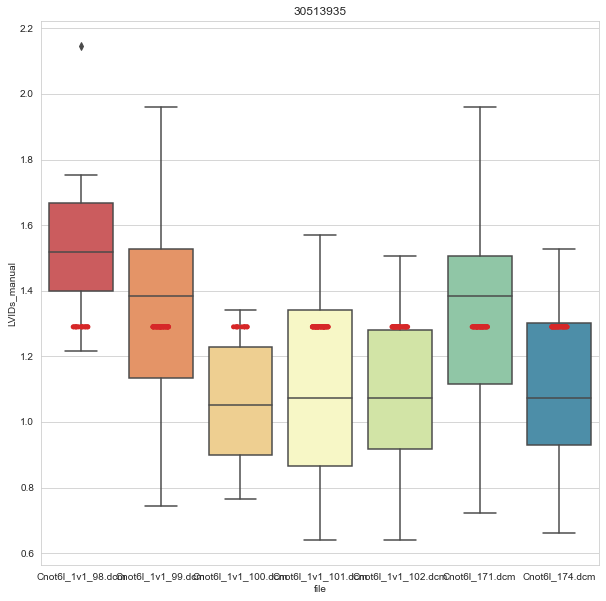

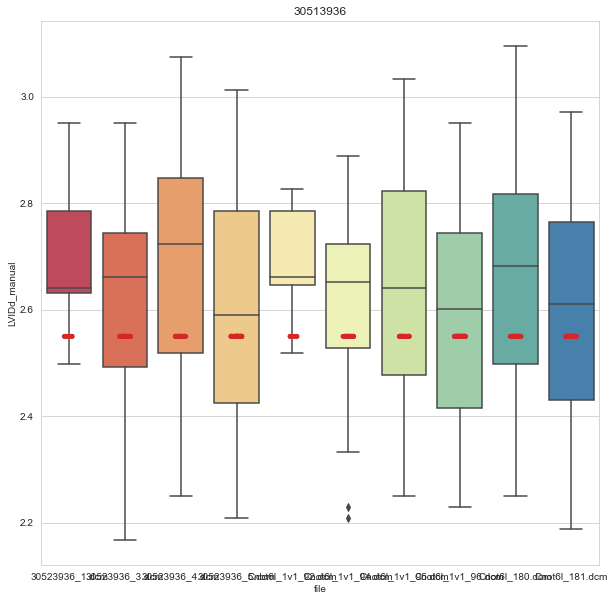

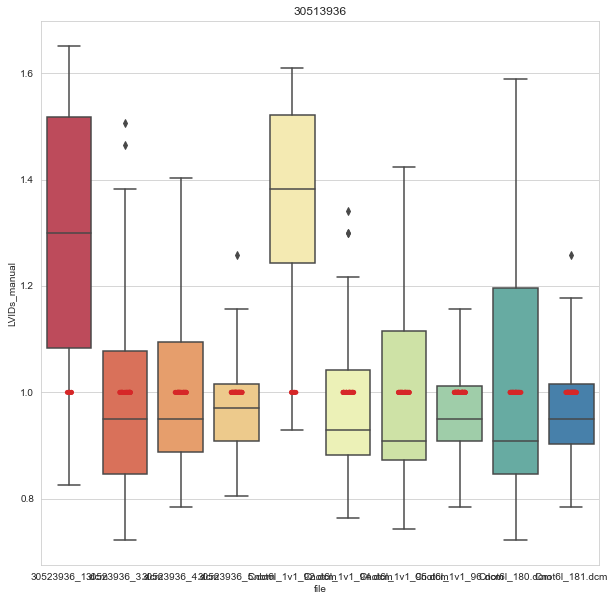

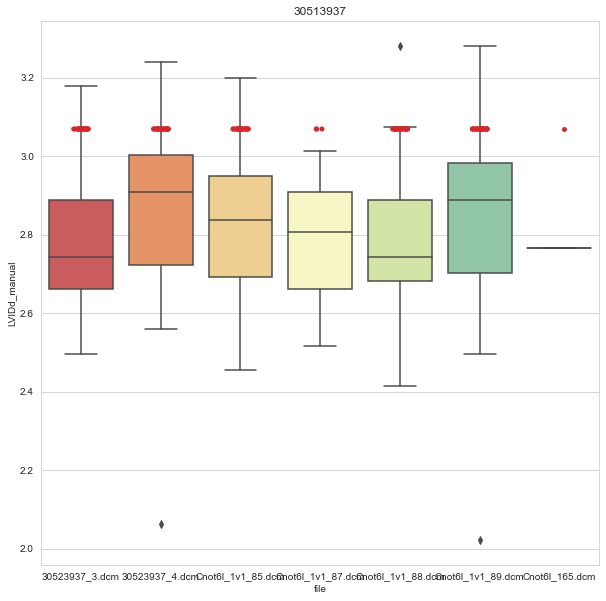

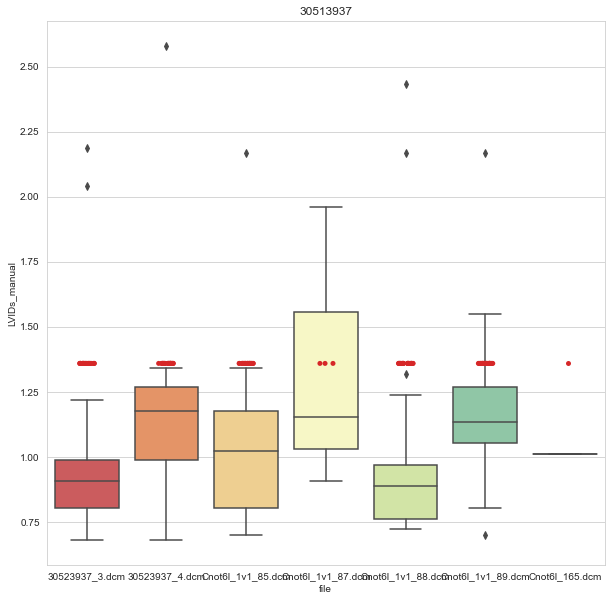

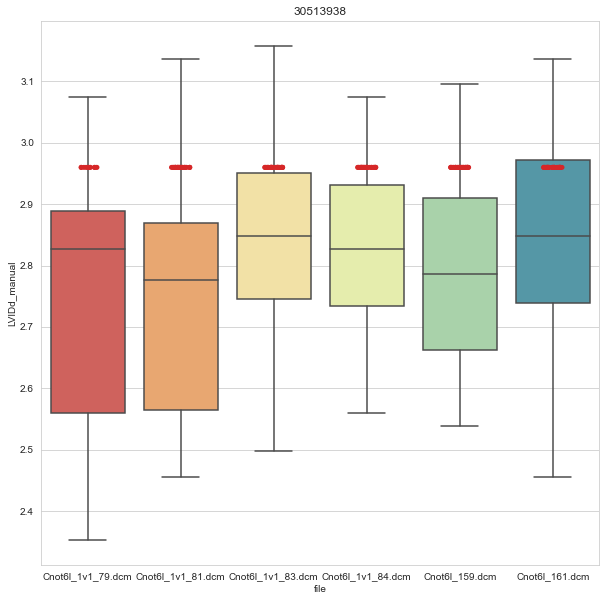

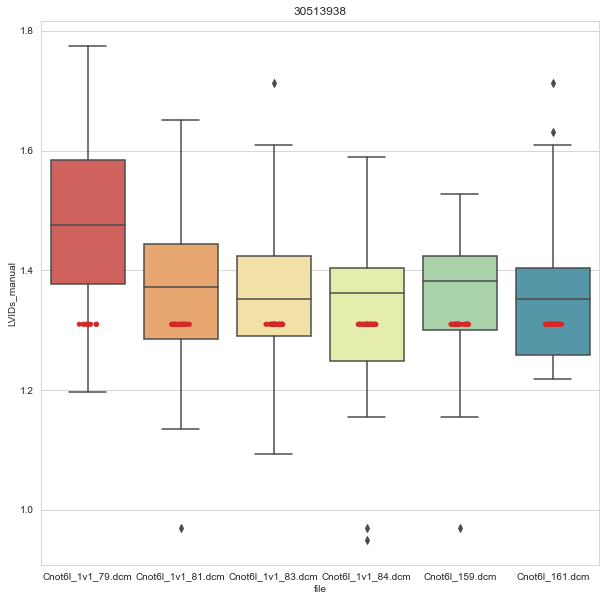

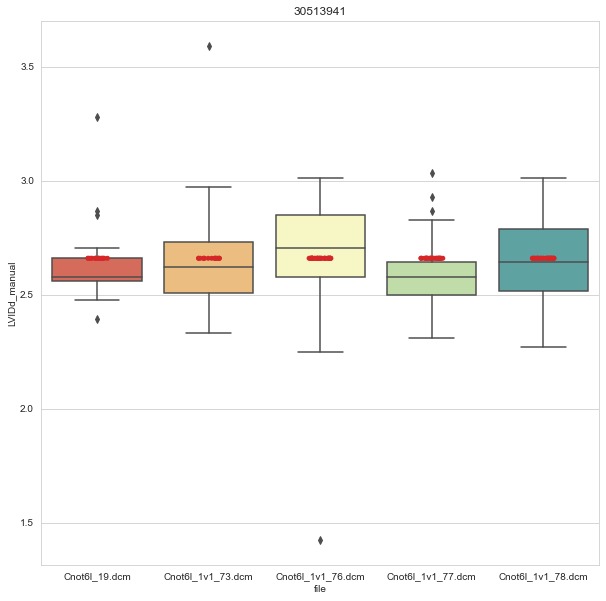

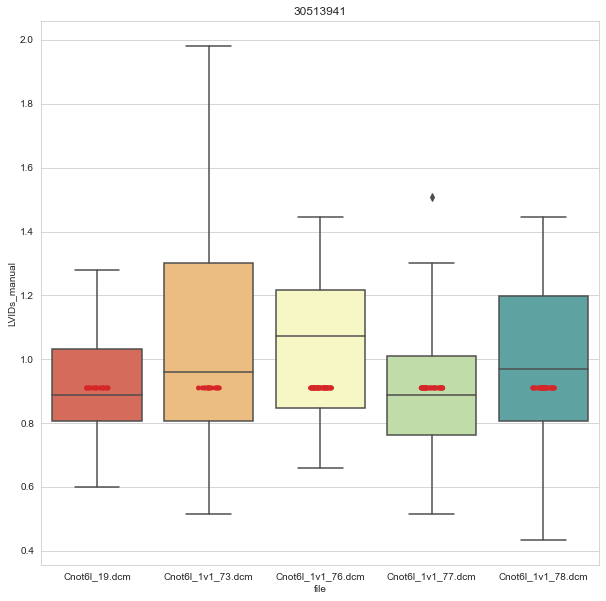

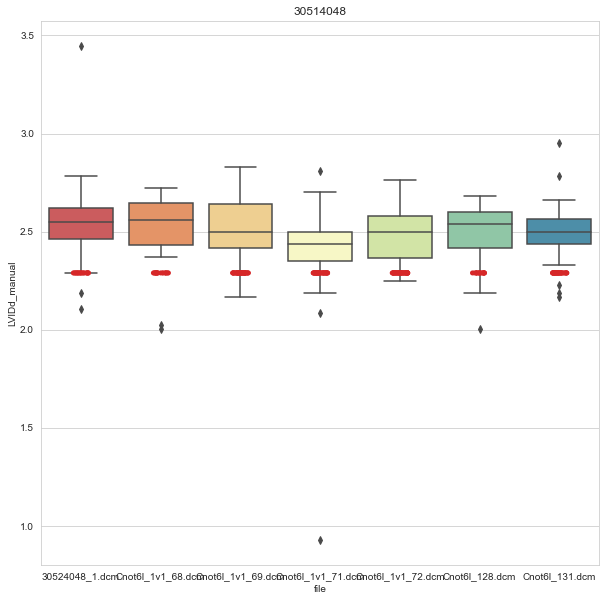

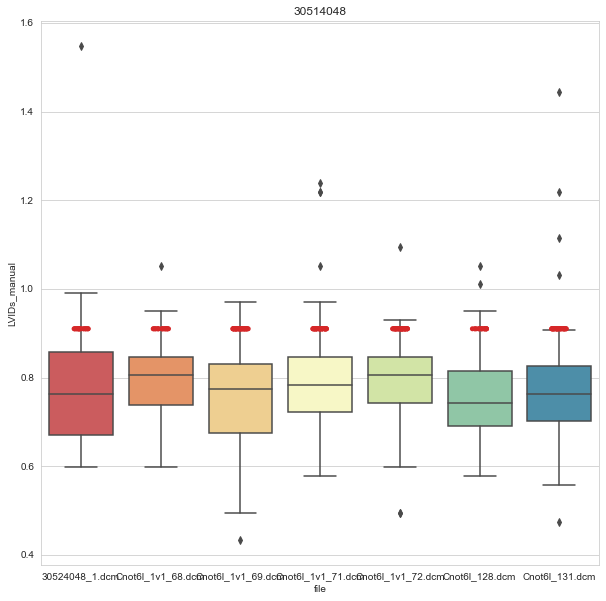

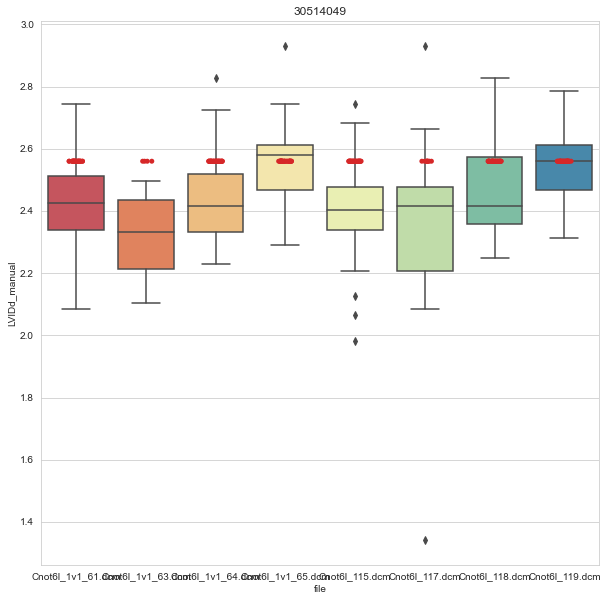

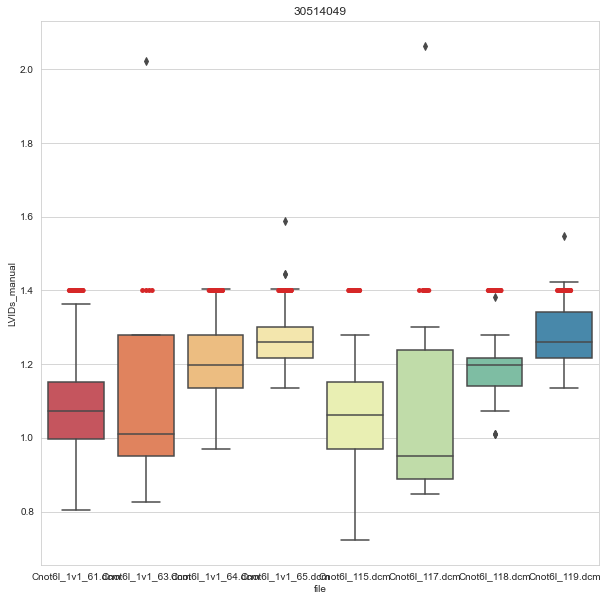

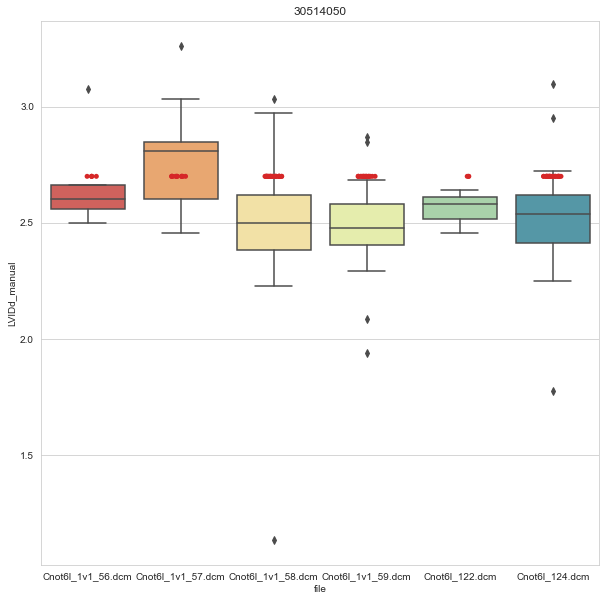

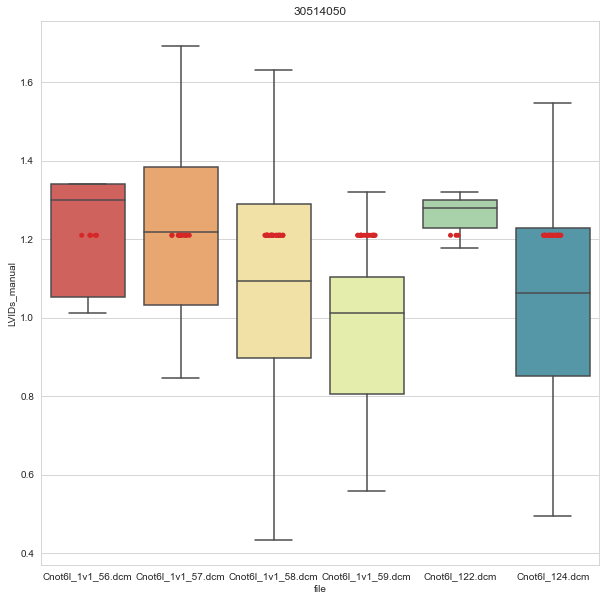

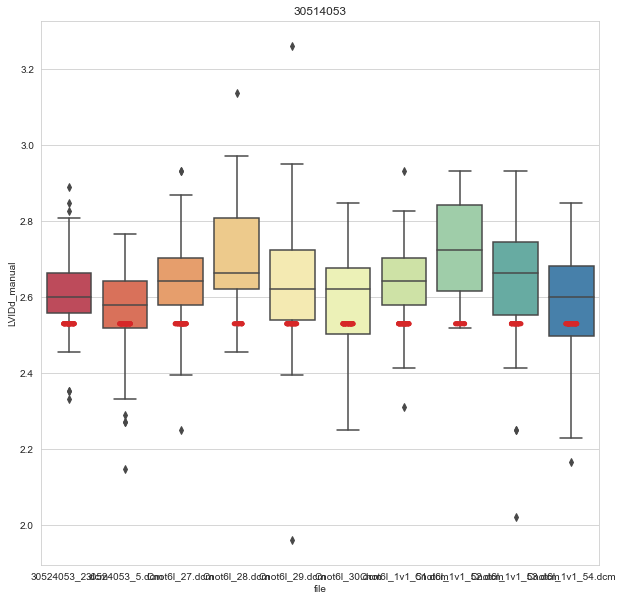

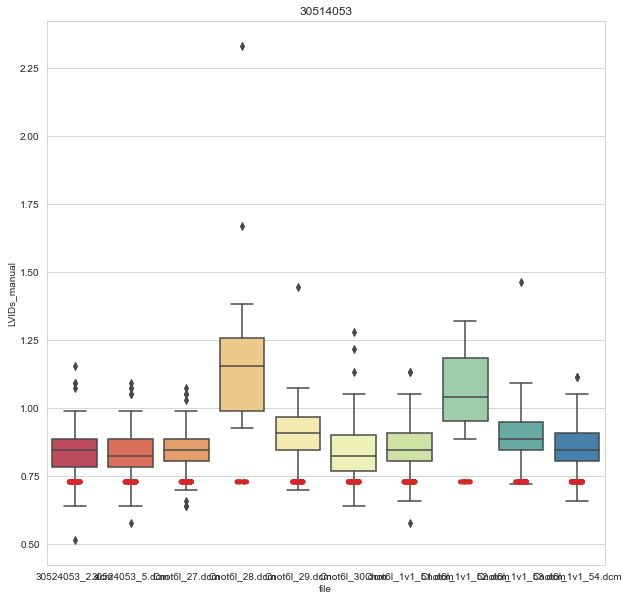

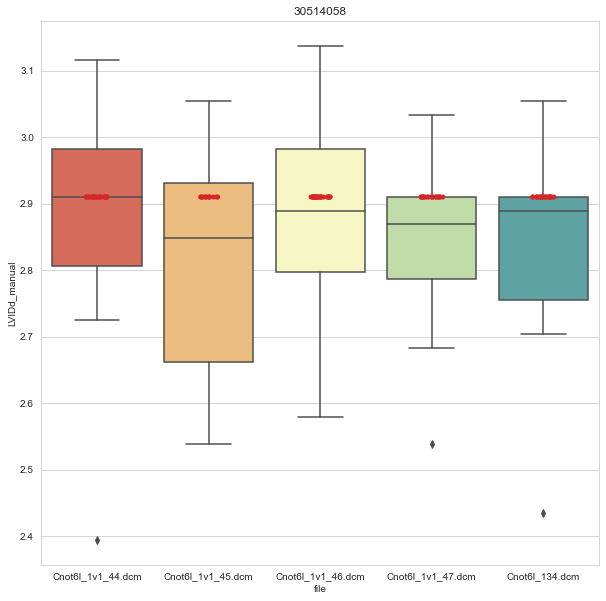

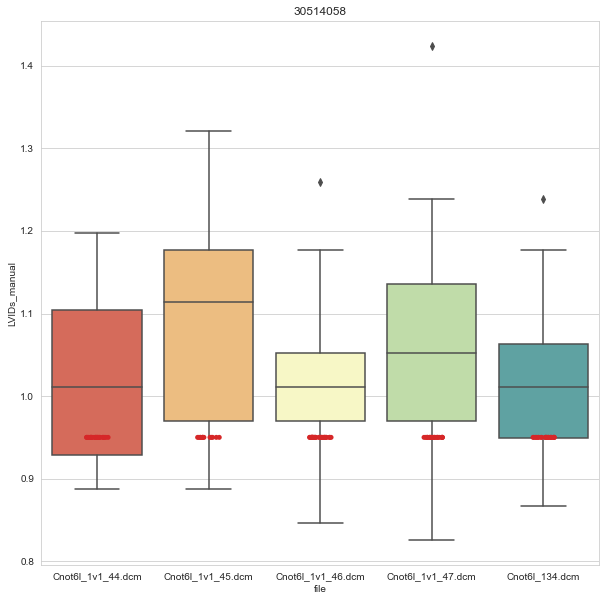

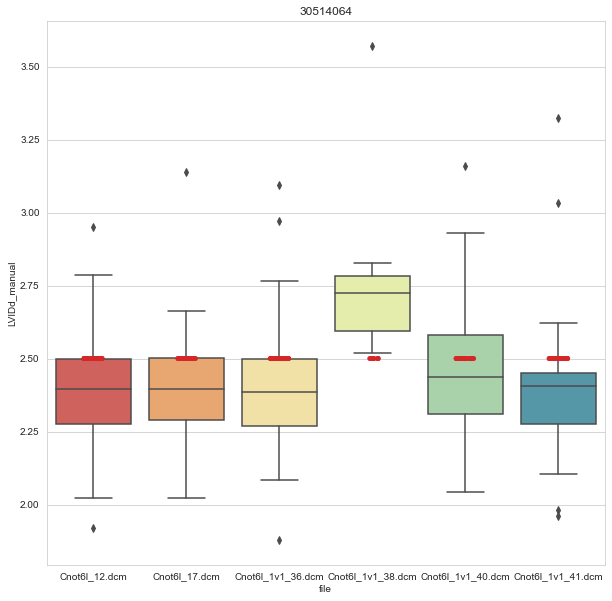

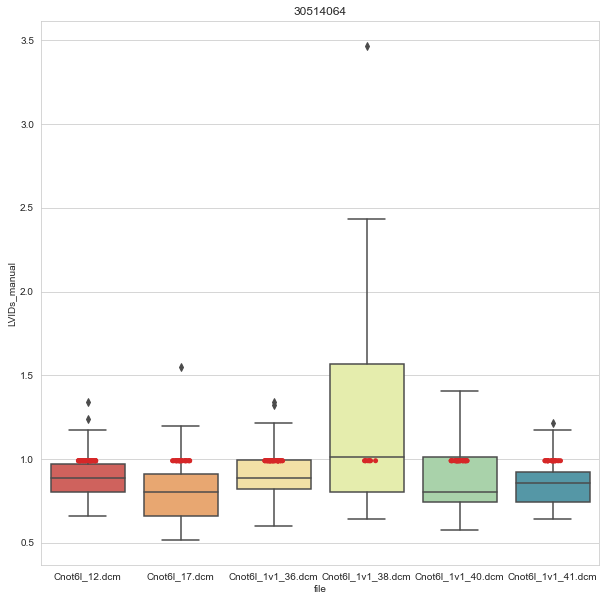

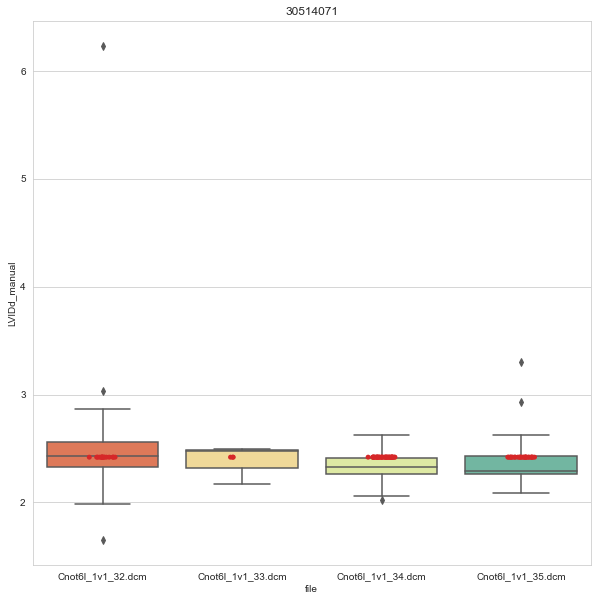

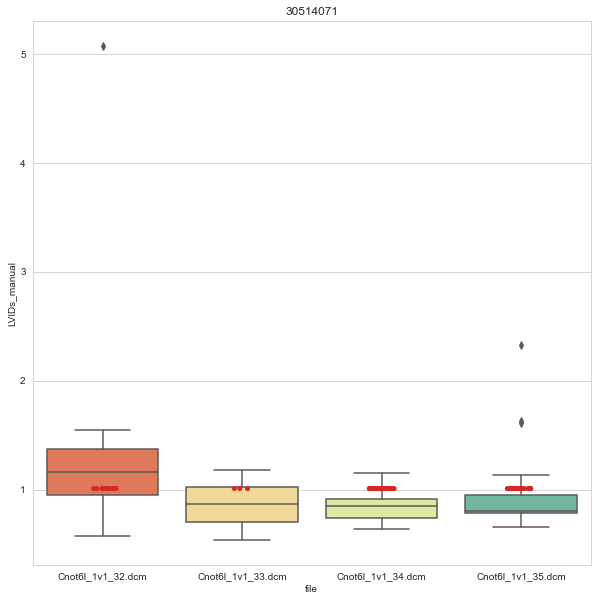

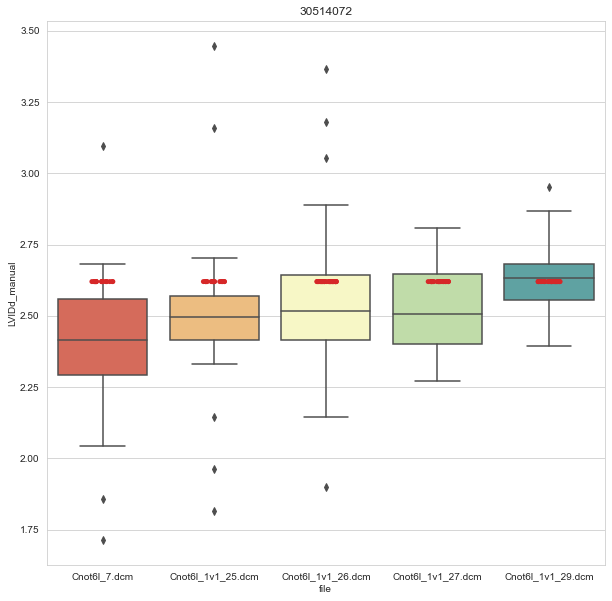

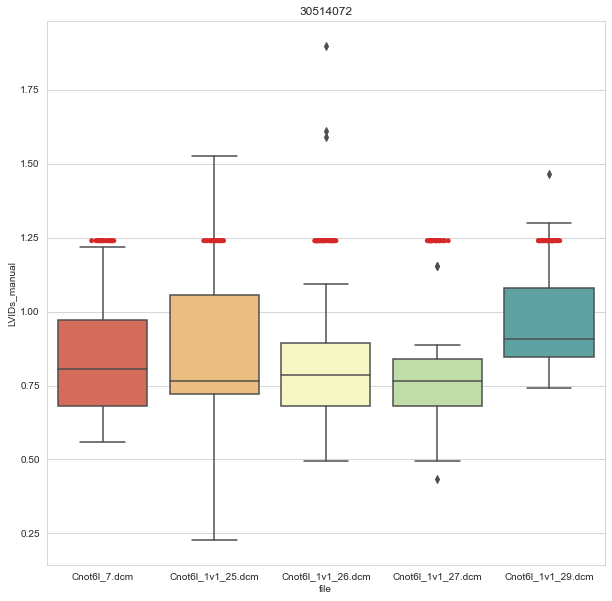

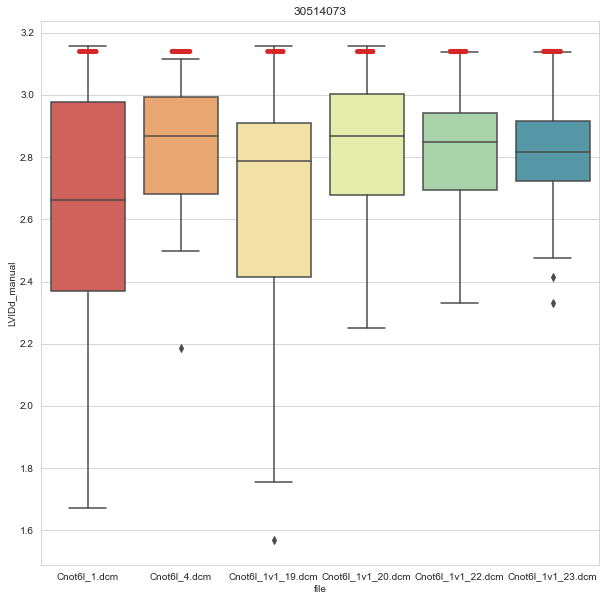

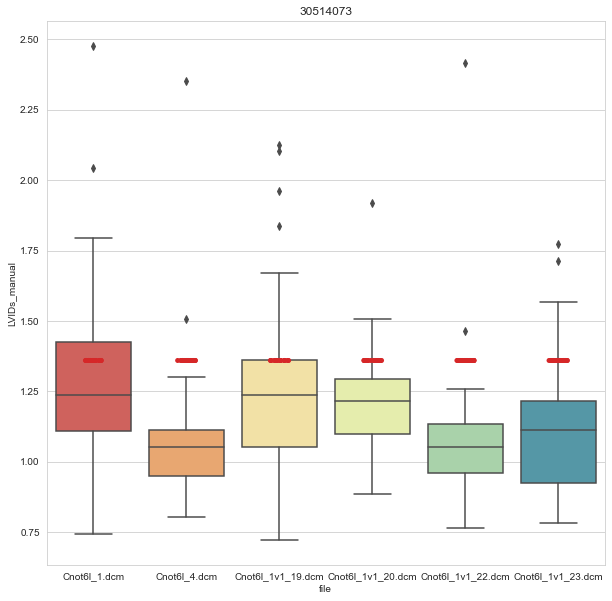

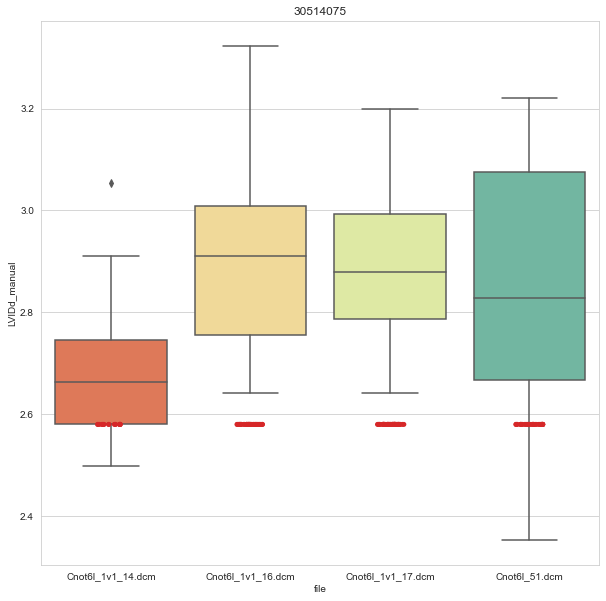

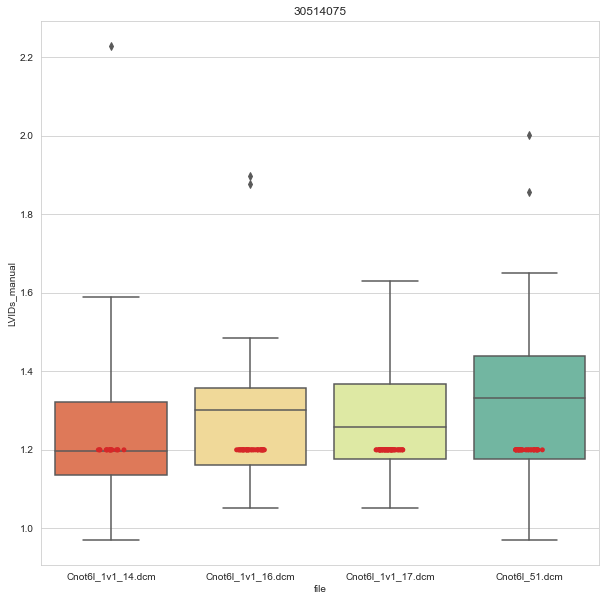

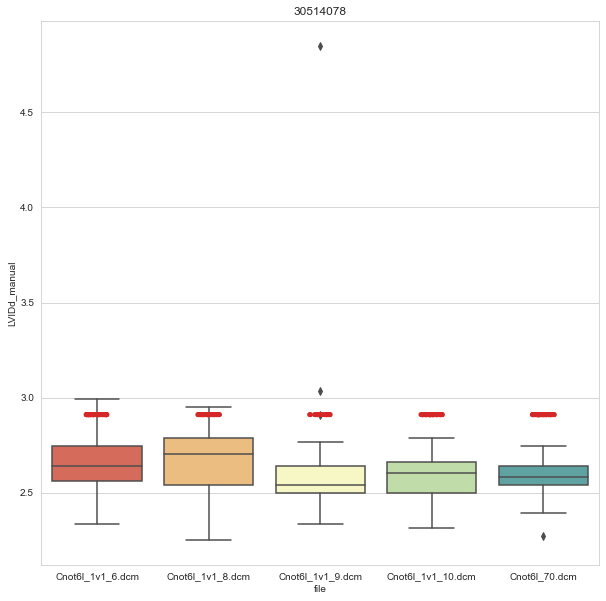

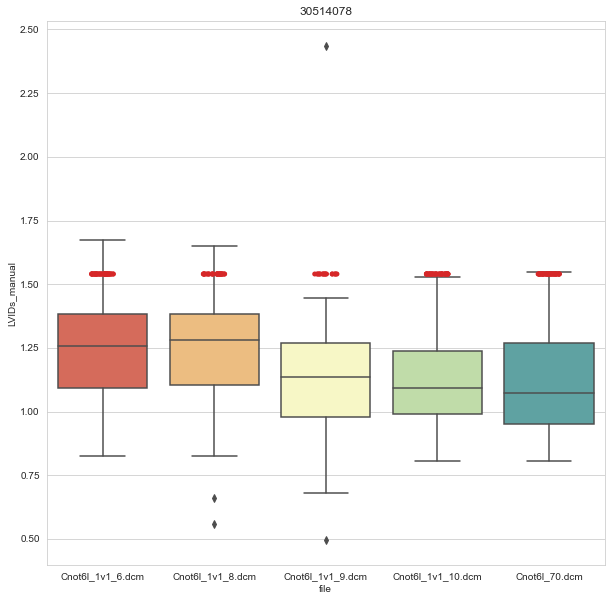

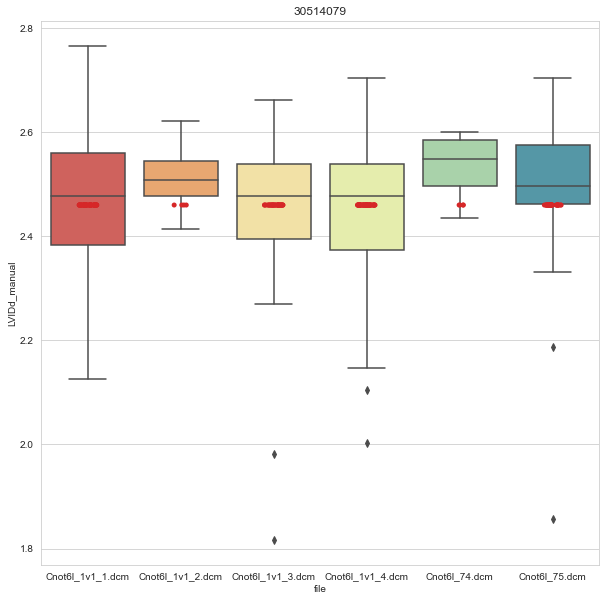

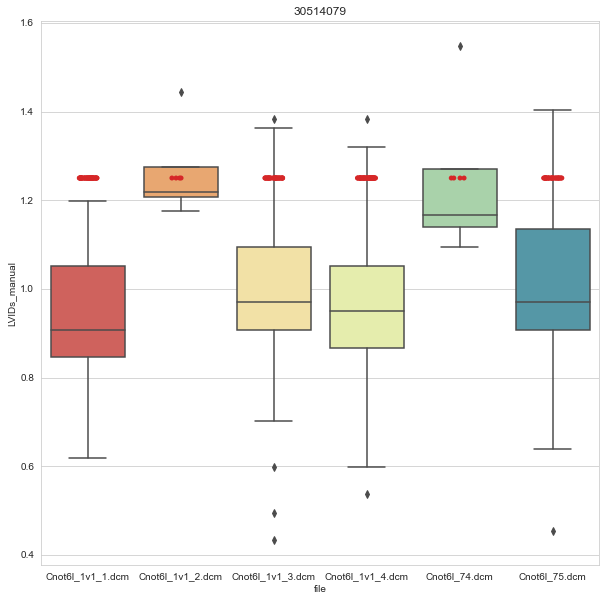

In [9]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [10]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
456,30513738,Cnot6l_1v1_198,73.479527,26.520473
457,30513738,Cnot6l_1v1_196,20.452210,79.547790
458,30513738,Cnot6l_1v1_199,95.580678,4.419322
459,30513738,Cnot6l_1v1_197,42.548818,57.451182
460,30513739,Cnot6l_88,56.467363,43.532637
...,...,...,...,...
1966,30513813,Sytl4_1v1_89,38.129496,61.870504
1967,30513813,Sytl4_1v1_88,0.000000,100.000000
1968,30513813,30523813_2,38.129496,61.870504
1969,30513813,Sytl4_1v1_90,60.219291,39.780709


### Image quality per mouse

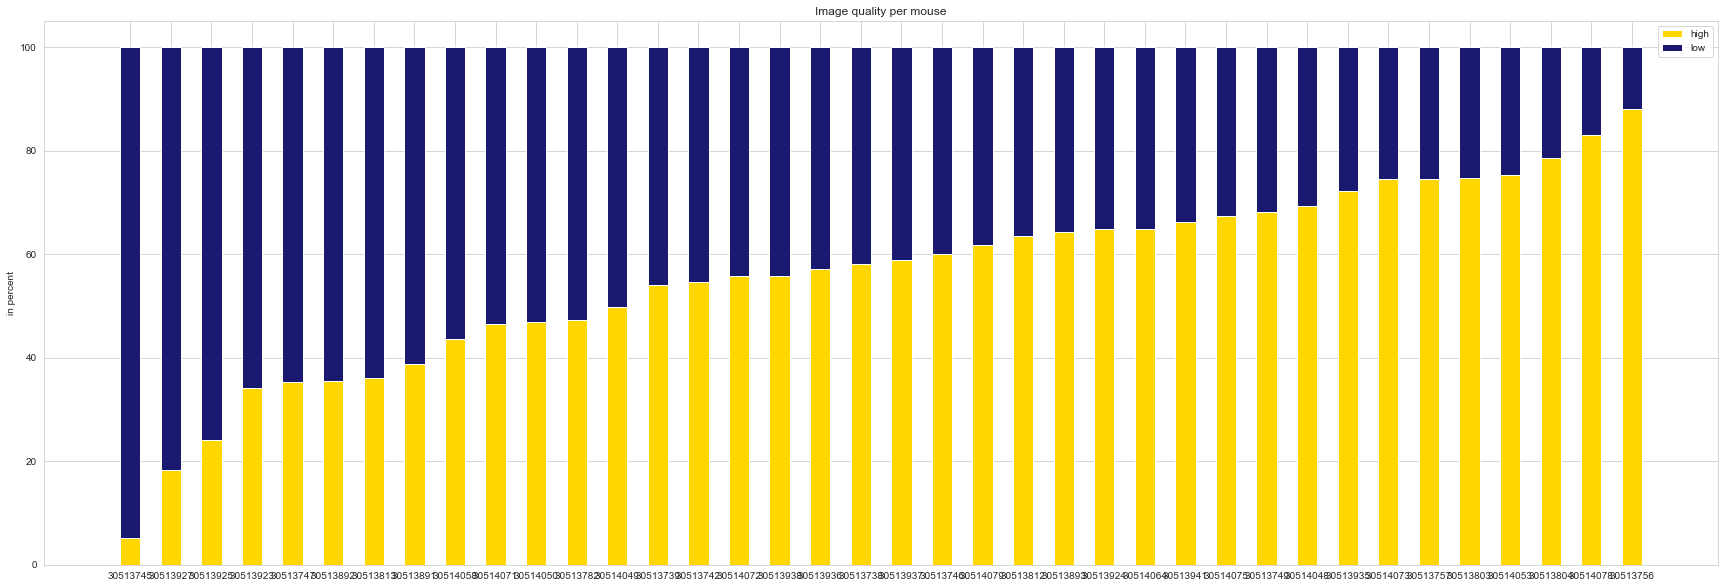

In [11]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [12]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Cnot6l,56.68,43.32


## Calculation of stats

In [13]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [14]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [15]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [16]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [17]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,6461.00,6461.00,6461.00,6461.00
mean,-0.07,-0.12,1.59,2.97
std,0.28,0.29,8.79,9.79
min,-2.61,-1.28,-85.98,-59.03
25%,-0.23,-0.29,-1.28,-2.27
50%,-0.06,-0.12,2.27,3.39
75%,0.10,0.05,5.57,8.68
max,3.81,4.07,24.30,37.42
number of mice,38.00,38.00,38.00,38.00


## Calculating p-values with manually annotated data

In [18]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [19]:
# LVIDs systole
_, f_man_LVIDs = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDs_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDs = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDs_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDs = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDs_manual'], manual[manual['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)

# LVIDs diastole
_, f_man_LVIDd = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDd_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDd = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDd_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDd = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDd_manual'], manual[manual['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)

# Ejection fraction
_, f_man_ef = mannwhitneyu(f_man[f_man['genotype'] == 'control']['EF_manual'], f_man[f_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, m_man_ef = mannwhitneyu(m_man[m_man['genotype'] == 'control']['EF_manual'], m_man[m_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, man_ef = mannwhitneyu(manual[manual['genotype'] == 'control']['EF_manual'], manual[manual['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)

#Fractional shortening
_, f_man_fs= mannwhitneyu(f_man[f_man['genotype'] == 'control']['FS_manual'], f_man[f_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, m_man_fs= mannwhitneyu(m_man[m_man['genotype'] == 'control']['FS_manual'], m_man[m_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, man_fs= mannwhitneyu(manual[manual['genotype'] == 'control']['FS_manual'], manual[manual['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)

## Calculating p-values with automatically annotated data

### Creation of subgroups

In [20]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

### Wilcoxn-Rank-Sum-Test

In [21]:
# LVIDs systole
_, p_f_auto_LVIDs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDs_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDs_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDs_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)

In [22]:
# LVIDs diastole
_, p_f_auto_LVIDd = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDd_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDd = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDd_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDd = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDd_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)

In [23]:
# Ejection fraction
_, p_f_auto_ef = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['EF_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_ef = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['EF_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_ef = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['EF_auto'], means_auto[means_auto['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)

In [24]:
# Fractional shortening
_, p_f_auto_fs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['FS_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_fs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['FS_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_fs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['FS_auto'], means_auto[means_auto['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)

In [25]:
p_values = pd.DataFrame([[f_man_LVIDs, p_f_auto_LVIDs, m_man_LVIDs, p_m_auto_LVIDs ],
                         [f_man_LVIDd, p_f_auto_LVIDd, m_man_LVIDd, p_m_auto_LVIDd ],
                         [f_man_ef   , p_f_auto_ef   , m_man_ef   , p_m_auto_ef    ],
                         [f_man_fs   , p_f_auto_fs   , m_man_fs   , p_m_auto_fs    ]],
                        index = ['LVIDs', 'LVIDd', 'ejection fraction', 'fractional shortening'],
                        columns = ['f manual', 'f automatic', 'm manual', 'm automatic'])

In [26]:
p_values.round(3)

,f manual,f automatic,m manual,m automatic
LVIDs,0.140,0.031,0.068,0.009
LVIDd,0.623,0.791,0.563,0.515
ejection fraction,0.064,0.014,0.021,0.000
fractional shortening,0.064,0.021,0.027,0.000


In [27]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control']),
      len(f_man[f_man['genotype'] == 'mutant']),
      len(means_auto_f[means_auto_f['genotype'] == 'mutant'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control']),
      len(m_man[m_man['genotype'] == 'mutant']),
      len(means_auto_m[means_auto_m['genotype'] == 'mutant'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con', 'man mut', 'auto mut']
)
num_stats

,man con,auto con,man mut,auto mut
f,10,10,10,10
m,10,10,8,8


In [28]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')
p_values.to_csv(gene + '_p_values.csv')

In [29]:
def color_p_values(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'coral' if val < 0.05 else ''
    return 'background-color: %s' % color

In [30]:
analysis_overview = p_values.style.applymap(color_p_values).format("{:1.3f}")
analysis_overview

,f manual,f automatic,m manual,m automatic
LVIDs,0.140,0.031,0.068,0.009
LVIDd,0.623,0.791,0.563,0.515
ejection fraction,0.064,0.014,0.021,0.000
fractional shortening,0.064,0.021,0.027,0.000
